Nvidia GPU's = only GPU's that support **CUDA** = language + framework used to do deep learning

In [1]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
## remove dir if present already, re-clone fastai repo
!rm -r -f fastai
!git clone https://github.com/fastai/fastai.git

Cloning into 'fastai'...
remote: Counting objects: 4822, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 4822 (delta 12), reused 17 (delta 10), pack-reused 4798
Receiving objects: 100% (4822/4822), 189.71 MiB | 25.73 MiB/s, done.
Resolving deltas: 100% (3054/3054), done.


In [0]:
# make sure conda is up to date
#!conda env update

In [4]:
!cd fastai | ls
# make sure fastai is up to date
#! git pull

data  datalab  dogscats.zip  fastai  wget-log


In [0]:
%matplotlib inline

In [6]:
### DO THIS EVERY TIME WE CONNECT TO NEW VM
## default environment doesn’t have Pytorch or torchvision so install manually
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl | pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


## Image Classification w/ **Convolutional Neural Networks (CNN)**

### Dogs v. Cats

Will try to enter Dogs v. Cats on Kaggle: 25k labelled photos available for training, 12.5k in test set. At time of competition launch (2013), state of the art = 80% accuracy.

In [7]:
# fixed imread error
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install --no-cache-dir -I pillow
import PIL._imaging

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
    100% |████████████████████████████████| 2.0MB 26.3MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
import sys

# get to directory with .py files
sys.path.insert(0, './fastai/fastai/')

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [9]:
## remove data and dataset if present already, re-download, dataset, remake data folder, unzip data into /data
!rm -r -f data && rm -f dogscats.zip && mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

## import libraries
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np # linear algebra and data analysis
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

--2018-05-08 23:10:34--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip         68%[============>       ] 560.79M  17.7MB/s    eta 25s    

dogscats.zip        100%[===================>] 817.50M  9.26MB/s    in 70s     

2018-05-08 23:11:44 (11.6 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: data/dogscats/sample/train/dogs/
  inflating: data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: data/dogs


  inflating: data/dogscats/train/cats/cat.8723.jpg  
  inflating: data/dogscats/train/cats/cat.6130.jpg  
  inflating: data/dogscats/train/cats/cat.5544.jpg  
  inflating: data/dogscats/train/cats/cat.10469.jpg  
  inflating: data/dogscats/train/cats/cat.2247.jpg  
  inflating: data/dogscats/train/cats/cat.3264.jpg  
  inflating: data/dogscats/train/cats/cat.7432.jpg  
  inflating: data/dogscats/train/cats/cat.2666.jpg  
  inflating: data/dogscats/train/cats/cat.6438.jpg  
  inflating: data/dogscats/train/cats/cat.8130.jpg  
  inflating: data/dogscats/train/cats/cat.2529.jpg  
  inflating: data/dogscats/train/cats/cat.12003.jpg  
  inflating: data/dogscats/train/cats/cat.161.jpg  
  inflating: data/dogscats/train/cats/cat.4222.jpg  
  inflating: data/dogscats/train/cats/cat.11188.jpg  
  inflating: data/dogscats/train/cats/cat.9287.jpg  
  inflating: data/dogscats/train/cats/cat.5740.jpg  
  inflating: data/dogscats/train/cats/cat.2422.jpg  
  inflating: data/dogscats/train/cats/cat.4


  inflating: data/dogscats/train/cats/cat.10209.jpg  
  inflating: data/dogscats/train/cats/cat.8896.jpg  
  inflating: data/dogscats/train/cats/cat.2742.jpg  
  inflating: data/dogscats/train/cats/cat.5633.jpg  
  inflating: data/dogscats/train/cats/cat.7591.jpg  
  inflating: data/dogscats/train/cats/cat.11462.jpg  
  inflating: data/dogscats/train/cats/cat.6648.jpg  
  inflating: data/dogscats/train/cats/cat.144.jpg  
  inflating: data/dogscats/train/cats/cat.9866.jpg  
  inflating: data/dogscats/train/cats/cat.6369.jpg  
  inflating: data/dogscats/train/cats/cat.5983.jpg  
  inflating: data/dogscats/train/cats/cat.4888.jpg  
  inflating: data/dogscats/train/cats/cat.3224.jpg  
  inflating: data/dogscats/train/cats/cat.3141.jpg  
  inflating: data/dogscats/train/cats/cat.6571.jpg  
  inflating: data/dogscats/train/cats/cat.12469.jpg  
  inflating: data/dogscats/train/cats/cat.3956.jpg  
  inflating: data/dogscats/train/cats/cat.4424.jpg  
  inflating: data/dogscats/train/cats/cat.3


  inflating: data/dogscats/train/cats/cat.11408.jpg  
  inflating: data/dogscats/train/cats/cat.11616.jpg  
  inflating: data/dogscats/train/cats/cat.3866.jpg  
  inflating: data/dogscats/train/cats/cat.10408.jpg  
  inflating: data/dogscats/train/cats/cat.3736.jpg  
  inflating: data/dogscats/train/cats/cat.327.jpg  
  inflating: data/dogscats/train/cats/cat.86.jpg  
  inflating: data/dogscats/train/cats/cat.12278.jpg  
  inflating: data/dogscats/train/cats/cat.11718.jpg  
  inflating: data/dogscats/train/cats/cat.4477.jpg  
  inflating: data/dogscats/train/cats/cat.473.jpg  
  inflating: data/dogscats/train/cats/cat.9387.jpg  
  inflating: data/dogscats/train/cats/cat.12382.jpg  
  inflating: data/dogscats/train/cats/cat.8061.jpg  
  inflating: data/dogscats/train/cats/cat.2984.jpg  
  inflating: data/dogscats/train/cats/cat.2978.jpg  
  inflating: data/dogscats/train/cats/cat.4272.jpg  
  inflating: data/dogscats/train/cats/cat.3667.jpg  
  inflating: data/dogscats/train/cats/cat.3


  inflating: data/dogscats/train/cats/cat.11102.jpg  
  inflating: data/dogscats/train/cats/cat.429.jpg  
  inflating: data/dogscats/train/cats/cat.8929.jpg  
  inflating: data/dogscats/train/cats/cat.11596.jpg  
  inflating: data/dogscats/train/cats/cat.2032.jpg  
  inflating: data/dogscats/train/cats/cat.8022.jpg  
  inflating: data/dogscats/train/cats/cat.3037.jpg  
  inflating: data/dogscats/train/cats/cat.2023.jpg  
  inflating: data/dogscats/train/cats/cat.4672.jpg  
  inflating: data/dogscats/train/cats/cat.2609.jpg  
  inflating: data/dogscats/train/cats/cat.2388.jpg  
  inflating: data/dogscats/train/cats/cat.6411.jpg  
  inflating: data/dogscats/train/cats/cat.10269.jpg  
  inflating: data/dogscats/train/cats/cat.2613.jpg  
  inflating: data/dogscats/train/cats/cat.5102.jpg  
  inflating: data/dogscats/train/cats/cat.5615.jpg  
  inflating: data/dogscats/train/cats/cat.11793.jpg  
  inflating: data/dogscats/train/cats/cat.7045.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.7244.jpg  
  inflating: data/dogscats/train/cats/cat.4524.jpg  
  inflating: data/dogscats/train/cats/cat.8585.jpg  
  inflating: data/dogscats/train/cats/cat.10957.jpg  
  inflating: data/dogscats/train/cats/cat.10921.jpg  
  inflating: data/dogscats/train/cats/cat.1511.jpg  
  inflating: data/dogscats/train/cats/cat.1505.jpg  
  inflating: data/dogscats/train/cats/cat.9494.jpg  
  inflating: data/dogscats/train/cats/cat.681.jpg  
  inflating: data/dogscats/train/cats/cat.7109.jpg  
  inflating: data/dogscats/train/cats/cat.10655.jpg  
  inflating: data/dogscats/train/cats/cat.4305.jpg  
  inflating: data/dogscats/train/cats/cat.8128.jpg  
  inflating: data/dogscats/train/cats/cat.6979.jpg  
  inflating: data/dogscats/train/cats/cat.8388.jpg  
  inflating: data/dogscats/train/cats/cat.3218.jpg  
  inflating: data/dogscats/train/cats/cat.8620.jpg  
  inflating: data/dogscats/train/cats/cat.3941.jpg  
  inflating: data/dogscats/train/cats/cat.8


  inflating: data/dogscats/train/cats/cat.10910.jpg  
  inflating: data/dogscats/train/cats/cat.6664.jpg  
  inflating: data/dogscats/train/cats/cat.1869.jpg  
  inflating: data/dogscats/train/cats/cat.11242.jpg  
  inflating: data/dogscats/train/cats/cat.12378.jpg  
  inflating: data/dogscats/train/cats/cat.6302.jpg  
  inflating: data/dogscats/train/cats/cat.12159.jpg  
  inflating: data/dogscats/train/cats/cat.1633.jpg  
  inflating: data/dogscats/train/cats/cat.388.jpg  
  inflating: data/dogscats/train/cats/cat.9794.jpg  
  inflating: data/dogscats/train/cats/cat.5955.jpg  
  inflating: data/dogscats/train/cats/cat.2027.jpg  
  inflating: data/dogscats/train/cats/cat.2248.jpg  
  inflating: data/dogscats/train/cats/cat.9334.jpg  
  inflating: data/dogscats/train/cats/cat.11770.jpg  
  inflating: data/dogscats/train/cats/cat.5871.jpg  
  inflating: data/dogscats/train/cats/cat.11548.jpg  
  inflating: data/dogscats/train/cats/cat.1458.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.1643.jpg  
  inflating: data/dogscats/train/cats/cat.1699.jpg  
  inflating: data/dogscats/train/cats/cat.6136.jpg  
  inflating: data/dogscats/train/cats/cat.651.jpg  
  inflating: data/dogscats/train/cats/cat.8420.jpg  
  inflating: data/dogscats/train/cats/cat.797.jpg  
  inflating: data/dogscats/train/cats/cat.1722.jpg  
  inflating: data/dogscats/train/cats/cat.6903.jpg  
  inflating: data/dogscats/train/cats/cat.10393.jpg  
  inflating: data/dogscats/train/cats/cat.6390.jpg  
  inflating: data/dogscats/train/cats/cat.12430.jpg  
  inflating: data/dogscats/train/cats/cat.4486.jpg  
  inflating: data/dogscats/train/cats/cat.8049.jpg  
  inflating: data/dogscats/train/cats/cat.11519.jpg  
  inflating: data/dogscats/train/cats/cat.11584.jpg  
  inflating: data/dogscats/train/cats/cat.8604.jpg  
  inflating: data/dogscats/train/cats/cat.11123.jpg  
  inflating: data/dogscats/train/cats/cat.5596.jpg  
  inflating: data/dogscats/train/cats/cat.1


  inflating: data/dogscats/train/cats/cat.3247.jpg  
  inflating: data/dogscats/train/cats/cat.10769.jpg  
  inflating: data/dogscats/train/cats/cat.10906.jpg  
  inflating: data/dogscats/train/cats/cat.11127.jpg  
  inflating: data/dogscats/train/cats/cat.5537.jpg  
  inflating: data/dogscats/train/cats/cat.7501.jpg  
  inflating: data/dogscats/train/cats/cat.4819.jpg  
  inflating: data/dogscats/train/cats/cat.10376.jpg  
  inflating: data/dogscats/train/cats/cat.1214.jpg  
  inflating: data/dogscats/train/cats/cat.4314.jpg  
  inflating: data/dogscats/train/cats/cat.9396.jpg  
  inflating: data/dogscats/train/cats/cat.9883.jpg  
  inflating: data/dogscats/train/cats/cat.11447.jpg  
  inflating: data/dogscats/train/cats/cat.6055.jpg  
  inflating: data/dogscats/train/cats/cat.4251.jpg  
  inflating: data/dogscats/train/cats/cat.8533.jpg  
  inflating: data/dogscats/train/cats/cat.4729.jpg  
  inflating: data/dogscats/train/cats/cat.7611.jpg  
  inflating: data/dogscats/train/cats/ca


  inflating: data/dogscats/train/cats/cat.654.jpg  
  inflating: data/dogscats/train/cats/cat.8660.jpg  
  inflating: data/dogscats/train/cats/cat.11130.jpg  
  inflating: data/dogscats/train/cats/cat.6432.jpg  
  inflating: data/dogscats/train/cats/cat.5337.jpg  
  inflating: data/dogscats/train/cats/cat.4841.jpg  
  inflating: data/dogscats/train/cats/cat.398.jpg  
  inflating: data/dogscats/train/cats/cat.10987.jpg  
  inflating: data/dogscats/train/cats/cat.10370.jpg  
  inflating: data/dogscats/train/cats/cat.6649.jpg  
  inflating: data/dogscats/train/cats/cat.2721.jpg  
  inflating: data/dogscats/train/cats/cat.4291.jpg  
  inflating: data/dogscats/train/cats/cat.11384.jpg  
  inflating: data/dogscats/train/cats/cat.702.jpg  
  inflating: data/dogscats/train/cats/cat.7953.jpg  
  inflating: data/dogscats/train/cats/cat.2828.jpg  
  inflating: data/dogscats/train/cats/cat.9448.jpg  
  inflating: data/dogscats/train/cats/cat.7252.jpg  
  inflating: data/dogscats/train/cats/cat.20

  inflating: data/dogscats/train/cats/cat.5724.jpg  
  inflating: data/dogscats/train/cats/cat.783.jpg  
  inflating: data/dogscats/train/cats/cat.10338.jpg  
  inflating: data/dogscats/train/cats/cat.4658.jpg  
  inflating: data/dogscats/train/cats/cat.6924.jpg  
  inflating: data/dogscats/train/cats/cat.1993.jpg  
  inflating: data/dogscats/train/cats/cat.2037.jpg  
  inflating: data/dogscats/train/cats/cat.11506.jpg  
  inflating: data/dogscats/train/cats/cat.5532.jpg  
  inflating: data/dogscats/train/cats/cat.279.jpg  
  inflating: data/dogscats/train/cats/cat.8882.jpg  
  inflating: data/dogscats/train/cats/cat.11578.jpg  
  inflating: data/dogscats/train/cats/cat.9219.jpg  
  inflating: data/dogscats/train/cats/cat.12038.jpg  
  inflating: data/dogscats/train/cats/cat.6150.jpg  
  inflating: data/dogscats/train/cats/cat.4327.jpg  
  inflating: data/dogscats/train/cats/cat.10635.jpg  
  inflating: data/dogscats/train/cats/cat.762.jpg  
  inflating: data/dogscats/train/cats/cat.10

  inflating: data/dogscats/train/cats/cat.10745.jpg  
  inflating: data/dogscats/train/cats/cat.10019.jpg  
  inflating: data/dogscats/train/cats/cat.7051.jpg  
  inflating: data/dogscats/train/cats/cat.11025.jpg  
  inflating: data/dogscats/train/cats/cat.1687.jpg  
  inflating: data/dogscats/train/cats/cat.11259.jpg  
  inflating: data/dogscats/train/cats/cat.8306.jpg  
  inflating: data/dogscats/train/cats/cat.3351.jpg  
  inflating: data/dogscats/train/cats/cat.4025.jpg  
  inflating: data/dogscats/train/cats/cat.5370.jpg  
  inflating: data/dogscats/train/cats/cat.2215.jpg  
  inflating: data/dogscats/train/cats/cat.7886.jpg  
  inflating: data/dogscats/train/cats/cat.10232.jpg  
  inflating: data/dogscats/train/cats/cat.2117.jpg  
  inflating: data/dogscats/train/cats/cat.9887.jpg  
  inflating: data/dogscats/train/cats/cat.2691.jpg  
  inflating: data/dogscats/train/cats/cat.9011.jpg  
  inflating: data/dogscats/train/cats/cat.12302.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.7961.jpg  
  inflating: data/dogscats/train/cats/cat.3232.jpg  
  inflating: data/dogscats/train/cats/cat.8078.jpg  
  inflating: data/dogscats/train/cats/cat.4249.jpg  
  inflating: data/dogscats/train/cats/cat.7271.jpg  
  inflating: data/dogscats/train/cats/cat.7729.jpg  
  inflating: data/dogscats/train/cats/cat.5888.jpg  
  inflating: data/dogscats/train/cats/cat.5753.jpg  
  inflating: data/dogscats/train/cats/cat.1998.jpg  
  inflating: data/dogscats/train/cats/cat.12179.jpg  
  inflating: data/dogscats/train/cats/cat.1347.jpg  
  inflating: data/dogscats/train/cats/cat.1726.jpg  
  inflating: data/dogscats/train/cats/cat.3739.jpg  
  inflating: data/dogscats/train/cats/cat.6313.jpg  
  inflating: data/dogscats/train/cats/cat.4008.jpg  
  inflating: data/dogscats/train/cats/cat.9818.jpg  
  inflating: data/dogscats/train/cats/cat.4585.jpg  
  inflating: data/dogscats/train/cats/cat.1083.jpg  
  inflating: data/dogscats/train/cats/cat.158


  inflating: data/dogscats/train/cats/cat.6359.jpg  
  inflating: data/dogscats/train/cats/cat.7378.jpg  
  inflating: data/dogscats/train/cats/cat.7246.jpg  
  inflating: data/dogscats/train/cats/cat.2158.jpg  
  inflating: data/dogscats/train/cats/cat.4374.jpg  
  inflating: data/dogscats/train/cats/cat.3171.jpg  
  inflating: data/dogscats/train/cats/cat.5830.jpg  
  inflating: data/dogscats/train/cats/cat.2226.jpg  
  inflating: data/dogscats/train/cats/cat.1112.jpg  
  inflating: data/dogscats/train/cats/cat.8257.jpg  
  inflating: data/dogscats/train/cats/cat.2973.jpg  
  inflating: data/dogscats/train/cats/cat.6131.jpg  
  inflating: data/dogscats/train/cats/cat.9460.jpg  
  inflating: data/dogscats/train/cats/cat.7260.jpg  
  inflating: data/dogscats/train/cats/cat.4165.jpg  
  inflating: data/dogscats/train/cats/cat.5430.jpg  
  inflating: data/dogscats/train/cats/cat.6179.jpg  
  inflating: data/dogscats/train/cats/cat.8430.jpg  
  inflating: data/dogscats/train/cats/cat.529

  inflating: data/dogscats/train/cats/cat.8436.jpg  
  inflating: data/dogscats/train/cats/cat.1353.jpg  
  inflating: data/dogscats/train/cats/cat.3422.jpg  
  inflating: data/dogscats/train/cats/cat.11385.jpg  
  inflating: data/dogscats/train/cats/cat.9858.jpg  
  inflating: data/dogscats/train/cats/cat.3911.jpg  
  inflating: data/dogscats/train/cats/cat.5400.jpg  
  inflating: data/dogscats/train/cats/cat.6455.jpg  
  inflating: data/dogscats/train/cats/cat.7302.jpg  
  inflating: data/dogscats/train/cats/cat.9452.jpg  
  inflating: data/dogscats/train/cats/cat.4809.jpg  
  inflating: data/dogscats/train/cats/cat.1371.jpg  
  inflating: data/dogscats/train/cats/cat.2020.jpg  
  inflating: data/dogscats/train/cats/cat.8682.jpg  
  inflating: data/dogscats/train/cats/cat.3569.jpg  
  inflating: data/dogscats/train/cats/cat.923.jpg  
  inflating: data/dogscats/train/cats/cat.1602.jpg  
  inflating: data/dogscats/train/cats/cat.11965.jpg  
  inflating: data/dogscats/train/cats/cat.124

  inflating: data/dogscats/train/cats/cat.6808.jpg  
  inflating: data/dogscats/train/cats/cat.7768.jpg  
  inflating: data/dogscats/train/cats/cat.2408.jpg  
  inflating: data/dogscats/train/cats/cat.2490.jpg  
  inflating: data/dogscats/train/cats/cat.10078.jpg  
  inflating: data/dogscats/train/cats/cat.5469.jpg  
  inflating: data/dogscats/train/cats/cat.874.jpg  
  inflating: data/dogscats/train/cats/cat.11569.jpg  
  inflating: data/dogscats/train/cats/cat.3871.jpg  
  inflating: data/dogscats/train/cats/cat.7151.jpg  
  inflating: data/dogscats/train/cats/cat.11550.jpg  
  inflating: data/dogscats/train/cats/cat.1849.jpg  
  inflating: data/dogscats/train/cats/cat.488.jpg  
  inflating: data/dogscats/train/cats/cat.10725.jpg  
  inflating: data/dogscats/train/cats/cat.12090.jpg  
  inflating: data/dogscats/train/cats/cat.2710.jpg  
  inflating: data/dogscats/train/cats/cat.10997.jpg  
  inflating: data/dogscats/train/cats/cat.10819.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.3115.jpg  
  inflating: data/dogscats/train/cats/cat.4579.jpg  
  inflating: data/dogscats/train/cats/cat.6153.jpg  
  inflating: data/dogscats/train/cats/cat.227.jpg  
  inflating: data/dogscats/train/cats/cat.5941.jpg  
  inflating: data/dogscats/train/cats/cat.7279.jpg  
  inflating: data/dogscats/train/cats/cat.8829.jpg  
  inflating: data/dogscats/train/cats/cat.7598.jpg  
  inflating: data/dogscats/train/cats/cat.10509.jpg  
  inflating: data/dogscats/train/cats/cat.4503.jpg  
  inflating: data/dogscats/train/cats/cat.3331.jpg  
  inflating: data/dogscats/train/cats/cat.11573.jpg  
  inflating: data/dogscats/train/cats/cat.8148.jpg  
  inflating: data/dogscats/train/cats/cat.2066.jpg  
  inflating: data/dogscats/train/cats/cat.1250.jpg  
  inflating: data/dogscats/train/cats/cat.8714.jpg  
  inflating: data/dogscats/train/cats/cat.6894.jpg  
  inflating: data/dogscats/train/cats/cat.1923.jpg  
  inflating: data/dogscats/train/cats/cat.319

  inflating: data/dogscats/train/cats/cat.4747.jpg  
  inflating: data/dogscats/train/cats/cat.1396.jpg  
  inflating: data/dogscats/train/cats/cat.9880.jpg  
  inflating: data/dogscats/train/cats/cat.12353.jpg  
  inflating: data/dogscats/train/cats/cat.450.jpg  
  inflating: data/dogscats/train/cats/cat.4147.jpg  
  inflating: data/dogscats/train/cats/cat.10301.jpg  
  inflating: data/dogscats/train/cats/cat.6743.jpg  
  inflating: data/dogscats/train/cats/cat.3219.jpg  
  inflating: data/dogscats/train/cats/cat.4988.jpg  
  inflating: data/dogscats/train/cats/cat.10142.jpg  
  inflating: data/dogscats/train/cats/cat.10084.jpg  
  inflating: data/dogscats/train/cats/cat.7931.jpg  
  inflating: data/dogscats/train/cats/cat.12123.jpg  
  inflating: data/dogscats/train/cats/cat.1509.jpg  
  inflating: data/dogscats/train/cats/cat.8461.jpg  
  inflating: data/dogscats/train/cats/cat.6517.jpg  
  inflating: data/dogscats/train/cats/cat.2153.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.3494.jpg  
  inflating: data/dogscats/train/cats/cat.10207.jpg  
  inflating: data/dogscats/train/cats/cat.5758.jpg  
  inflating: data/dogscats/train/cats/cat.1265.jpg  
  inflating: data/dogscats/train/cats/cat.5640.jpg  
  inflating: data/dogscats/train/cats/cat.288.jpg  
  inflating: data/dogscats/train/cats/cat.5690.jpg  
  inflating: data/dogscats/train/cats/cat.9305.jpg  
  inflating: data/dogscats/train/cats/cat.4919.jpg  
  inflating: data/dogscats/train/cats/cat.4266.jpg  
  inflating: data/dogscats/train/cats/cat.7426.jpg  
  inflating: data/dogscats/train/cats/cat.2402.jpg  
  inflating: data/dogscats/train/cats/cat.3536.jpg  
  inflating: data/dogscats/train/cats/cat.5752.jpg  
  inflating: data/dogscats/train/cats/cat.7954.jpg  
  inflating: data/dogscats/train/cats/cat.11143.jpg  
  inflating: data/dogscats/train/cats/cat.6350.jpg  
  inflating: data/dogscats/train/cats/cat.2445.jpg  
  inflating: data/dogscats/train/cats/cat.91

  inflating: data/dogscats/train/dogs/dog.5511.jpg  
  inflating: data/dogscats/train/dogs/dog.841.jpg  
  inflating: data/dogscats/train/dogs/dog.6337.jpg  
  inflating: data/dogscats/train/dogs/dog.12482.jpg  
  inflating: data/dogscats/train/dogs/dog.3874.jpg  
  inflating: data/dogscats/train/dogs/dog.3686.jpg  
  inflating: data/dogscats/train/dogs/dog.12468.jpg  
  inflating: data/dogscats/train/dogs/dog.11505.jpg  
  inflating: data/dogscats/train/dogs/dog.10107.jpg  
  inflating: data/dogscats/train/dogs/dog.65.jpg  
  inflating: data/dogscats/train/dogs/dog.431.jpg  
  inflating: data/dogscats/train/dogs/dog.2699.jpg  
  inflating: data/dogscats/train/dogs/dog.6613.jpg  
  inflating: data/dogscats/train/dogs/dog.2345.jpg  
  inflating: data/dogscats/train/dogs/dog.9731.jpg  
  inflating: data/dogscats/train/dogs/dog.7011.jpg  
  inflating: data/dogscats/train/dogs/dog.7390.jpg  
  inflating: data/dogscats/train/dogs/dog.2690.jpg  
  inflating: data/dogscats/train/dogs/dog.1164


  inflating: data/dogscats/train/dogs/dog.8309.jpg  
  inflating: data/dogscats/train/dogs/dog.7446.jpg  
  inflating: data/dogscats/train/dogs/dog.9774.jpg  
  inflating: data/dogscats/train/dogs/dog.2001.jpg  
  inflating: data/dogscats/train/dogs/dog.10224.jpg  
  inflating: data/dogscats/train/dogs/dog.10405.jpg  
  inflating: data/dogscats/train/dogs/dog.10664.jpg  
  inflating: data/dogscats/train/dogs/dog.11661.jpg  
  inflating: data/dogscats/train/dogs/dog.1219.jpg  
  inflating: data/dogscats/train/dogs/dog.10701.jpg  
  inflating: data/dogscats/train/dogs/dog.6120.jpg  
  inflating: data/dogscats/train/dogs/dog.3436.jpg  
  inflating: data/dogscats/train/dogs/dog.6090.jpg  
  inflating: data/dogscats/train/dogs/dog.10329.jpg  
  inflating: data/dogscats/train/dogs/dog.11253.jpg  
  inflating: data/dogscats/train/dogs/dog.1010.jpg  
  inflating: data/dogscats/train/dogs/dog.8688.jpg  
  inflating: data/dogscats/train/dogs/dog.10846.jpg  
  inflating: data/dogscats/train/dogs


  inflating: data/dogscats/train/dogs/dog.11913.jpg  
  inflating: data/dogscats/train/dogs/dog.7819.jpg  
  inflating: data/dogscats/train/dogs/dog.7657.jpg  
  inflating: data/dogscats/train/dogs/dog.54.jpg  
  inflating: data/dogscats/train/dogs/dog.12198.jpg  
  inflating: data/dogscats/train/dogs/dog.6543.jpg  
  inflating: data/dogscats/train/dogs/dog.12176.jpg  
  inflating: data/dogscats/train/dogs/dog.3098.jpg  
  inflating: data/dogscats/train/dogs/dog.9071.jpg  
  inflating: data/dogscats/train/dogs/dog.7992.jpg  
  inflating: data/dogscats/train/dogs/dog.11038.jpg  
  inflating: data/dogscats/train/dogs/dog.9793.jpg  
  inflating: data/dogscats/train/dogs/dog.4925.jpg  
  inflating: data/dogscats/train/dogs/dog.10070.jpg  
  inflating: data/dogscats/train/dogs/dog.5268.jpg  
  inflating: data/dogscats/train/dogs/dog.17.jpg  
  inflating: data/dogscats/train/dogs/dog.7877.jpg  
  inflating: data/dogscats/train/dogs/dog.10679.jpg  
  inflating: data/dogscats/train/dogs/dog.1


  inflating: data/dogscats/train/dogs/dog.10029.jpg  
  inflating: data/dogscats/train/dogs/dog.8393.jpg  
  inflating: data/dogscats/train/dogs/dog.6642.jpg  
  inflating: data/dogscats/train/dogs/dog.11105.jpg  
  inflating: data/dogscats/train/dogs/dog.12127.jpg  
  inflating: data/dogscats/train/dogs/dog.3081.jpg  
  inflating: data/dogscats/train/dogs/dog.3032.jpg  
  inflating: data/dogscats/train/dogs/dog.2606.jpg  
  inflating: data/dogscats/train/dogs/dog.8006.jpg  
  inflating: data/dogscats/train/dogs/dog.8356.jpg  
  inflating: data/dogscats/train/dogs/dog.10898.jpg  
  inflating: data/dogscats/train/dogs/dog.9840.jpg  
  inflating: data/dogscats/train/dogs/dog.2010.jpg  
  inflating: data/dogscats/train/dogs/dog.453.jpg  
  inflating: data/dogscats/train/dogs/dog.9427.jpg  
  inflating: data/dogscats/train/dogs/dog.5244.jpg  
  inflating: data/dogscats/train/dogs/dog.342.jpg  
  inflating: data/dogscats/train/dogs/dog.8604.jpg  
  inflating: data/dogscats/train/dogs/dog.1


  inflating: data/dogscats/train/dogs/dog.2448.jpg  
  inflating: data/dogscats/train/dogs/dog.7436.jpg  
  inflating: data/dogscats/train/dogs/dog.689.jpg  
  inflating: data/dogscats/train/dogs/dog.1369.jpg  
  inflating: data/dogscats/train/dogs/dog.8019.jpg  
  inflating: data/dogscats/train/dogs/dog.1581.jpg  
  inflating: data/dogscats/train/dogs/dog.5325.jpg  
  inflating: data/dogscats/train/dogs/dog.4700.jpg  
  inflating: data/dogscats/train/dogs/dog.8508.jpg  
  inflating: data/dogscats/train/dogs/dog.120.jpg  
  inflating: data/dogscats/train/dogs/dog.8684.jpg  
  inflating: data/dogscats/train/dogs/dog.1618.jpg  
  inflating: data/dogscats/train/dogs/dog.2839.jpg  
  inflating: data/dogscats/train/dogs/dog.4174.jpg  
  inflating: data/dogscats/train/dogs/dog.8824.jpg  
  inflating: data/dogscats/train/dogs/dog.5159.jpg  
  inflating: data/dogscats/train/dogs/dog.198.jpg  
  inflating: data/dogscats/train/dogs/dog.10093.jpg  
  inflating: data/dogscats/train/dogs/dog.2881.

  inflating: data/dogscats/train/dogs/dog.3608.jpg  
  inflating: data/dogscats/train/dogs/dog.9255.jpg  
  inflating: data/dogscats/train/dogs/dog.8782.jpg  
  inflating: data/dogscats/train/dogs/dog.6080.jpg  
  inflating: data/dogscats/train/dogs/dog.4163.jpg  
  inflating: data/dogscats/train/dogs/dog.1680.jpg  
  inflating: data/dogscats/train/dogs/dog.11210.jpg  
  inflating: data/dogscats/train/dogs/dog.7948.jpg  
  inflating: data/dogscats/train/dogs/dog.9248.jpg  
  inflating: data/dogscats/train/dogs/dog.11953.jpg  
  inflating: data/dogscats/train/dogs/dog.9775.jpg  
  inflating: data/dogscats/train/dogs/dog.5939.jpg  
  inflating: data/dogscats/train/dogs/dog.925.jpg  
  inflating: data/dogscats/train/dogs/dog.6682.jpg  
  inflating: data/dogscats/train/dogs/dog.9614.jpg  
  inflating: data/dogscats/train/dogs/dog.12422.jpg  
  inflating: data/dogscats/train/dogs/dog.4990.jpg  
  inflating: data/dogscats/train/dogs/dog.11869.jpg  
  inflating: data/dogscats/train/dogs/dog.1


  inflating: data/dogscats/train/dogs/dog.7958.jpg  
  inflating: data/dogscats/train/dogs/dog.8455.jpg  
  inflating: data/dogscats/train/dogs/dog.7057.jpg  
  inflating: data/dogscats/train/dogs/dog.6657.jpg  
  inflating: data/dogscats/train/dogs/dog.11212.jpg  
  inflating: data/dogscats/train/dogs/dog.2953.jpg  
  inflating: data/dogscats/train/dogs/dog.8851.jpg  
  inflating: data/dogscats/train/dogs/dog.3669.jpg  
  inflating: data/dogscats/train/dogs/dog.4482.jpg  
  inflating: data/dogscats/train/dogs/dog.2544.jpg  
  inflating: data/dogscats/train/dogs/dog.6251.jpg  
  inflating: data/dogscats/train/dogs/dog.9505.jpg  
  inflating: data/dogscats/train/dogs/dog.7732.jpg  
  inflating: data/dogscats/train/dogs/dog.4417.jpg  
  inflating: data/dogscats/train/dogs/dog.3256.jpg  
  inflating: data/dogscats/train/dogs/dog.5664.jpg  
  inflating: data/dogscats/train/dogs/dog.466.jpg  
  inflating: data/dogscats/train/dogs/dog.5056.jpg  
  inflating: data/dogscats/train/dogs/dog.384


  inflating: data/dogscats/train/dogs/dog.4947.jpg  
  inflating: data/dogscats/train/dogs/dog.5291.jpg  
  inflating: data/dogscats/train/dogs/dog.11683.jpg  
  inflating: data/dogscats/train/dogs/dog.3667.jpg  
  inflating: data/dogscats/train/dogs/dog.8920.jpg  
  inflating: data/dogscats/train/dogs/dog.7853.jpg  
  inflating: data/dogscats/train/dogs/dog.1087.jpg  
  inflating: data/dogscats/train/dogs/dog.2751.jpg  
  inflating: data/dogscats/train/dogs/dog.7336.jpg  
  inflating: data/dogscats/train/dogs/dog.3697.jpg  
  inflating: data/dogscats/train/dogs/dog.4028.jpg  
  inflating: data/dogscats/train/dogs/dog.1278.jpg  
  inflating: data/dogscats/train/dogs/dog.435.jpg  
  inflating: data/dogscats/train/dogs/dog.4352.jpg  
  inflating: data/dogscats/train/dogs/dog.5603.jpg  
  inflating: data/dogscats/train/dogs/dog.7307.jpg  
  inflating: data/dogscats/train/dogs/dog.9363.jpg  
  inflating: data/dogscats/train/dogs/dog.10453.jpg  
  inflating: data/dogscats/train/dogs/dog.99

  inflating: data/dogscats/train/dogs/dog.2784.jpg  
  inflating: data/dogscats/train/dogs/dog.4536.jpg  
  inflating: data/dogscats/train/dogs/dog.4907.jpg  
  inflating: data/dogscats/train/dogs/dog.3157.jpg  
  inflating: data/dogscats/train/dogs/dog.9823.jpg  
  inflating: data/dogscats/train/dogs/dog.3717.jpg  
  inflating: data/dogscats/train/dogs/dog.2643.jpg  
  inflating: data/dogscats/train/dogs/dog.7146.jpg  
  inflating: data/dogscats/train/dogs/dog.5856.jpg  
  inflating: data/dogscats/train/dogs/dog.8705.jpg  
  inflating: data/dogscats/train/dogs/dog.4284.jpg  
  inflating: data/dogscats/train/dogs/dog.1852.jpg  
  inflating: data/dogscats/train/dogs/dog.5749.jpg  
  inflating: data/dogscats/train/dogs/dog.12090.jpg  
  inflating: data/dogscats/train/dogs/dog.9976.jpg  
  inflating: data/dogscats/train/dogs/dog.1805.jpg  
  inflating: data/dogscats/train/dogs/dog.1647.jpg  
  inflating: data/dogscats/train/dogs/dog.6616.jpg  
  inflating: data/dogscats/train/dogs/dog.836


  inflating: data/dogscats/train/dogs/dog.2753.jpg  
  inflating: data/dogscats/train/dogs/dog.2330.jpg  
  inflating: data/dogscats/train/dogs/dog.9234.jpg  
  inflating: data/dogscats/train/dogs/dog.5833.jpg  
  inflating: data/dogscats/train/dogs/dog.1633.jpg  
  inflating: data/dogscats/train/dogs/dog.3838.jpg  
  inflating: data/dogscats/train/dogs/dog.5060.jpg  
  inflating: data/dogscats/train/dogs/dog.9851.jpg  
  inflating: data/dogscats/train/dogs/dog.2042.jpg  
  inflating: data/dogscats/train/dogs/dog.8410.jpg  
  inflating: data/dogscats/train/dogs/dog.5250.jpg  
  inflating: data/dogscats/train/dogs/dog.2718.jpg  
  inflating: data/dogscats/train/dogs/dog.4133.jpg  
  inflating: data/dogscats/train/dogs/dog.6435.jpg  
  inflating: data/dogscats/train/dogs/dog.11960.jpg  
  inflating: data/dogscats/train/dogs/dog.8790.jpg  
  inflating: data/dogscats/train/dogs/dog.10710.jpg  
  inflating: data/dogscats/train/dogs/dog.1061.jpg  
  inflating: data/dogscats/train/dogs/dog.7

  inflating: data/dogscats/train/dogs/dog.7488.jpg  
  inflating: data/dogscats/train/dogs/dog.9199.jpg  
  inflating: data/dogscats/train/dogs/dog.239.jpg  
  inflating: data/dogscats/train/dogs/dog.10136.jpg  
  inflating: data/dogscats/train/dogs/dog.9730.jpg  
  inflating: data/dogscats/train/dogs/dog.7961.jpg  
  inflating: data/dogscats/train/dogs/dog.10991.jpg  
  inflating: data/dogscats/train/dogs/dog.4479.jpg  
  inflating: data/dogscats/train/dogs/dog.7584.jpg  
  inflating: data/dogscats/train/dogs/dog.800.jpg  
  inflating: data/dogscats/train/dogs/dog.8197.jpg  
  inflating: data/dogscats/train/dogs/dog.9709.jpg  
  inflating: data/dogscats/train/dogs/dog.9835.jpg  
  inflating: data/dogscats/train/dogs/dog.3597.jpg  
  inflating: data/dogscats/train/dogs/dog.4196.jpg  
  inflating: data/dogscats/train/dogs/dog.7905.jpg  
  inflating: data/dogscats/train/dogs/dog.6439.jpg  
  inflating: data/dogscats/train/dogs/dog.4109.jpg  
  inflating: data/dogscats/train/dogs/dog.1149

  inflating: data/dogscats/train/dogs/dog.8191.jpg  
  inflating: data/dogscats/train/dogs/dog.8103.jpg  
  inflating: data/dogscats/train/dogs/dog.5177.jpg  
  inflating: data/dogscats/train/dogs/dog.2439.jpg  
  inflating: data/dogscats/train/dogs/dog.10835.jpg  
  inflating: data/dogscats/train/dogs/dog.8236.jpg  
  inflating: data/dogscats/train/dogs/dog.9605.jpg  
  inflating: data/dogscats/train/dogs/dog.10142.jpg  
  inflating: data/dogscats/train/dogs/dog.10667.jpg  
  inflating: data/dogscats/train/dogs/dog.1009.jpg  
  inflating: data/dogscats/train/dogs/dog.5476.jpg  
  inflating: data/dogscats/train/dogs/dog.8287.jpg  
  inflating: data/dogscats/train/dogs/dog.4793.jpg  
  inflating: data/dogscats/train/dogs/dog.4717.jpg  
  inflating: data/dogscats/train/dogs/dog.9170.jpg  
  inflating: data/dogscats/train/dogs/dog.773.jpg  
  inflating: data/dogscats/train/dogs/dog.1538.jpg  
  inflating: data/dogscats/train/dogs/dog.8676.jpg  
  inflating: data/dogscats/train/dogs/dog.13

  inflating: data/dogscats/train/dogs/dog.573.jpg  
  inflating: data/dogscats/train/dogs/dog.11116.jpg  
  inflating: data/dogscats/train/dogs/dog.3290.jpg  
  inflating: data/dogscats/train/dogs/dog.8753.jpg  
  inflating: data/dogscats/train/dogs/dog.5433.jpg  
  inflating: data/dogscats/train/dogs/dog.6130.jpg  
  inflating: data/dogscats/train/dogs/dog.11142.jpg  
  inflating: data/dogscats/train/dogs/dog.8134.jpg  
  inflating: data/dogscats/train/dogs/dog.4017.jpg  
  inflating: data/dogscats/train/dogs/dog.3926.jpg  
  inflating: data/dogscats/train/dogs/dog.6281.jpg  
  inflating: data/dogscats/train/dogs/dog.7462.jpg  
  inflating: data/dogscats/train/dogs/dog.1943.jpg  
  inflating: data/dogscats/train/dogs/dog.6599.jpg  
  inflating: data/dogscats/train/dogs/dog.9745.jpg  
  inflating: data/dogscats/train/dogs/dog.9762.jpg  
  inflating: data/dogscats/train/dogs/dog.5818.jpg  
  inflating: data/dogscats/train/dogs/dog.9245.jpg  
  inflating: data/dogscats/train/dogs/dog.108


  inflating: data/dogscats/train/dogs/dog.8053.jpg  
  inflating: data/dogscats/train/dogs/dog.5970.jpg  
  inflating: data/dogscats/train/dogs/dog.1102.jpg  
  inflating: data/dogscats/train/dogs/dog.8931.jpg  
  inflating: data/dogscats/train/dogs/dog.7939.jpg  
  inflating: data/dogscats/train/dogs/dog.11586.jpg  
  inflating: data/dogscats/train/dogs/dog.1959.jpg  
  inflating: data/dogscats/train/dogs/dog.3185.jpg  
  inflating: data/dogscats/train/dogs/dog.10485.jpg  
  inflating: data/dogscats/train/dogs/dog.8817.jpg  
  inflating: data/dogscats/train/dogs/dog.10186.jpg  
  inflating: data/dogscats/train/dogs/dog.8379.jpg  
  inflating: data/dogscats/train/dogs/dog.10121.jpg  
  inflating: data/dogscats/train/dogs/dog.7205.jpg  
  inflating: data/dogscats/train/dogs/dog.3300.jpg  
  inflating: data/dogscats/train/dogs/dog.8368.jpg  
  inflating: data/dogscats/train/dogs/dog.11006.jpg  
  inflating: data/dogscats/train/dogs/dog.8999.jpg  
  inflating: data/dogscats/train/dogs/do


  inflating: data/dogscats/train/dogs/dog.8552.jpg  
  inflating: data/dogscats/train/dogs/dog.8209.jpg  
  inflating: data/dogscats/train/dogs/dog.3321.jpg  
  inflating: data/dogscats/train/dogs/dog.7325.jpg  
  inflating: data/dogscats/train/dogs/dog.12250.jpg  
  inflating: data/dogscats/train/dogs/dog.6511.jpg  
  inflating: data/dogscats/train/dogs/dog.3274.jpg  
  inflating: data/dogscats/train/dogs/dog.4796.jpg  
  inflating: data/dogscats/train/dogs/dog.4162.jpg  
  inflating: data/dogscats/train/dogs/dog.3487.jpg  
  inflating: data/dogscats/train/dogs/dog.9661.jpg  
  inflating: data/dogscats/train/dogs/dog.6064.jpg  
  inflating: data/dogscats/train/dogs/dog.4100.jpg  
  inflating: data/dogscats/train/dogs/dog.12014.jpg  
  inflating: data/dogscats/train/dogs/dog.618.jpg  
  inflating: data/dogscats/train/dogs/dog.7271.jpg  
  inflating: data/dogscats/train/dogs/dog.5263.jpg  
  inflating: data/dogscats/train/dogs/dog.5682.jpg  
  inflating: data/dogscats/train/dogs/dog.33


  inflating: data/dogscats/train/dogs/dog.3873.jpg  
  inflating: data/dogscats/train/dogs/dog.8801.jpg  
  inflating: data/dogscats/train/dogs/dog.8440.jpg  
  inflating: data/dogscats/train/dogs/dog.7340.jpg  
  inflating: data/dogscats/train/dogs/dog.6486.jpg  
  inflating: data/dogscats/train/dogs/dog.12013.jpg  
  inflating: data/dogscats/train/dogs/dog.7637.jpg  
  inflating: data/dogscats/train/dogs/dog.3147.jpg  
  inflating: data/dogscats/train/dogs/dog.9666.jpg  
  inflating: data/dogscats/train/dogs/dog.6512.jpg  
  inflating: data/dogscats/train/dogs/dog.9520.jpg  
  inflating: data/dogscats/train/dogs/dog.5634.jpg  
  inflating: data/dogscats/train/dogs/dog.8743.jpg  
  inflating: data/dogscats/train/dogs/dog.7935.jpg  
  inflating: data/dogscats/train/dogs/dog.887.jpg  
  inflating: data/dogscats/train/dogs/dog.1531.jpg  
  inflating: data/dogscats/train/dogs/dog.5334.jpg  
  inflating: data/dogscats/train/dogs/dog.8060.jpg  
  inflating: data/dogscats/train/dogs/dog.113

  inflating: data/dogscats/train/dogs/dog.591.jpg  
  inflating: data/dogscats/train/dogs/dog.616.jpg  
  inflating: data/dogscats/train/dogs/dog.4503.jpg  
  inflating: data/dogscats/train/dogs/dog.1534.jpg  
  inflating: data/dogscats/train/dogs/dog.8101.jpg  
  inflating: data/dogscats/train/dogs/dog.8112.jpg  
  inflating: data/dogscats/train/dogs/dog.843.jpg  
  inflating: data/dogscats/train/dogs/dog.4441.jpg  
  inflating: data/dogscats/train/dogs/dog.11084.jpg  
  inflating: data/dogscats/train/dogs/dog.4370.jpg  
  inflating: data/dogscats/train/dogs/dog.8713.jpg  
  inflating: data/dogscats/train/dogs/dog.5515.jpg  
  inflating: data/dogscats/train/dogs/dog.7602.jpg  
  inflating: data/dogscats/train/dogs/dog.3187.jpg  
  inflating: data/dogscats/train/dogs/dog.1784.jpg  
  inflating: data/dogscats/train/dogs/dog.3997.jpg  
  inflating: data/dogscats/train/dogs/dog.8384.jpg  
  inflating: data/dogscats/train/dogs/dog.12240.jpg  
  inflating: data/dogscats/train/dogs/dog.10809

  inflating: data/dogscats/train/dogs/dog.2754.jpg  
  inflating: data/dogscats/train/dogs/dog.5167.jpg  
  inflating: data/dogscats/train/dogs/dog.6467.jpg  
  inflating: data/dogscats/train/dogs/dog.6897.jpg  
  inflating: data/dogscats/train/dogs/dog.12396.jpg  
  inflating: data/dogscats/train/dogs/dog.6348.jpg  
  inflating: data/dogscats/train/dogs/dog.1946.jpg  
  inflating: data/dogscats/train/dogs/dog.11020.jpg  
  inflating: data/dogscats/train/dogs/dog.9617.jpg  
  inflating: data/dogscats/train/dogs/dog.1830.jpg  
  inflating: data/dogscats/train/dogs/dog.4893.jpg  
  inflating: data/dogscats/train/dogs/dog.7230.jpg  
  inflating: data/dogscats/train/dogs/dog.11132.jpg  
  inflating: data/dogscats/train/dogs/dog.3724.jpg  
  inflating: data/dogscats/train/dogs/dog.2098.jpg  
  inflating: data/dogscats/train/dogs/dog.9357.jpg  
  inflating: data/dogscats/train/dogs/dog.768.jpg  
  inflating: data/dogscats/train/dogs/dog.8185.jpg  
  inflating: data/dogscats/train/dogs/dog.19

  inflating: data/dogscats/train/dogs/dog.8649.jpg  
  inflating: data/dogscats/train/dogs/dog.7368.jpg  
  inflating: data/dogscats/train/dogs/dog.8732.jpg  
  inflating: data/dogscats/train/dogs/dog.8739.jpg  
  inflating: data/dogscats/train/dogs/dog.6943.jpg  
  inflating: data/dogscats/train/dogs/dog.9735.jpg  
  inflating: data/dogscats/train/dogs/dog.4932.jpg  
  inflating: data/dogscats/train/dogs/dog.6402.jpg  
  inflating: data/dogscats/train/dogs/dog.4880.jpg  
  inflating: data/dogscats/train/dogs/dog.8924.jpg  
  inflating: data/dogscats/train/dogs/dog.7665.jpg  
  inflating: data/dogscats/train/dogs/dog.7750.jpg  
  inflating: data/dogscats/train/dogs/dog.10514.jpg  
  inflating: data/dogscats/train/dogs/dog.11300.jpg  
  inflating: data/dogscats/train/dogs/dog.12206.jpg  
  inflating: data/dogscats/train/dogs/dog.7807.jpg  
  inflating: data/dogscats/train/dogs/dog.672.jpg  
  inflating: data/dogscats/train/dogs/dog.2926.jpg  
  inflating: data/dogscats/train/dogs/dog.27

  inflating: data/dogscats/train/dogs/dog.4692.jpg  
  inflating: data/dogscats/train/dogs/dog.5952.jpg  
  inflating: data/dogscats/train/dogs/dog.6267.jpg  
  inflating: data/dogscats/train/dogs/dog.311.jpg  
  inflating: data/dogscats/train/dogs/dog.6964.jpg  
  inflating: data/dogscats/train/dogs/dog.5087.jpg  
  inflating: data/dogscats/train/dogs/dog.5315.jpg  
  inflating: data/dogscats/train/dogs/dog.5235.jpg  
  inflating: data/dogscats/train/dogs/dog.365.jpg  
  inflating: data/dogscats/train/dogs/dog.9626.jpg  
  inflating: data/dogscats/train/dogs/dog.2469.jpg  
  inflating: data/dogscats/train/dogs/dog.11301.jpg  
  inflating: data/dogscats/train/dogs/dog.6256.jpg  
  inflating: data/dogscats/train/dogs/dog.5659.jpg  
  inflating: data/dogscats/train/dogs/dog.1148.jpg  
  inflating: data/dogscats/train/dogs/dog.600.jpg  
  inflating: data/dogscats/train/dogs/dog.444.jpg  
  inflating: data/dogscats/train/dogs/dog.7143.jpg  
  inflating: data/dogscats/train/dogs/dog.5459.jp


  inflating: data/dogscats/train/dogs/dog.2928.jpg  
  inflating: data/dogscats/train/dogs/dog.9171.jpg  
  inflating: data/dogscats/train/dogs/dog.3194.jpg  
  inflating: data/dogscats/train/dogs/dog.6362.jpg  
  inflating: data/dogscats/train/dogs/dog.5540.jpg  
  inflating: data/dogscats/train/dogs/dog.10626.jpg  
  inflating: data/dogscats/train/dogs/dog.3216.jpg  
  inflating: data/dogscats/train/dogs/dog.9452.jpg  
  inflating: data/dogscats/train/dogs/dog.2680.jpg  
  inflating: data/dogscats/train/dogs/dog.8560.jpg  
  inflating: data/dogscats/train/dogs/dog.11669.jpg  
  inflating: data/dogscats/train/dogs/dog.9299.jpg  
  inflating: data/dogscats/train/dogs/dog.6323.jpg  
  inflating: data/dogscats/train/dogs/dog.6505.jpg  
  inflating: data/dogscats/train/dogs/dog.463.jpg  
  inflating: data/dogscats/train/dogs/dog.889.jpg  
  inflating: data/dogscats/train/dogs/dog.7505.jpg  
  inflating: data/dogscats/train/dogs/dog.3645.jpg  
  inflating: data/dogscats/train/dogs/dog.490


  inflating: data/dogscats/valid/cats/cat.4840.jpg  
  inflating: data/dogscats/valid/cats/cat.3886.jpg  
  inflating: data/dogscats/valid/cats/cat.6440.jpg  
  inflating: data/dogscats/valid/cats/cat.2537.jpg  
  inflating: data/dogscats/valid/cats/cat.12419.jpg  
  inflating: data/dogscats/valid/cats/cat.6368.jpg  
  inflating: data/dogscats/valid/cats/cat.12106.jpg  
  inflating: data/dogscats/valid/cats/cat.23.jpg  
  inflating: data/dogscats/valid/cats/cat.4219.jpg  
  inflating: data/dogscats/valid/cats/cat.6539.jpg  
  inflating: data/dogscats/valid/cats/cat.4455.jpg  
  inflating: data/dogscats/valid/cats/cat.2647.jpg  
  inflating: data/dogscats/valid/cats/cat.2203.jpg  
  inflating: data/dogscats/valid/cats/cat.994.jpg  
  inflating: data/dogscats/valid/cats/cat.8293.jpg  
  inflating: data/dogscats/valid/cats/cat.155.jpg  
  inflating: data/dogscats/valid/cats/cat.6295.jpg  
  inflating: data/dogscats/valid/cats/cat.2409.jpg  
  inflating: data/dogscats/valid/cats/cat.8935.

  inflating: data/dogscats/valid/cats/cat.10048.jpg  
  inflating: data/dogscats/valid/cats/cat.7436.jpg  
  inflating: data/dogscats/valid/cats/cat.7566.jpg  
  inflating: data/dogscats/valid/cats/cat.8480.jpg  
  inflating: data/dogscats/valid/cats/cat.3279.jpg  
  inflating: data/dogscats/valid/cats/cat.11404.jpg  
  inflating: data/dogscats/valid/cats/cat.10748.jpg  
  inflating: data/dogscats/valid/cats/cat.8970.jpg  
  inflating: data/dogscats/valid/cats/cat.1158.jpg  
  inflating: data/dogscats/valid/cats/cat.4058.jpg  
  inflating: data/dogscats/valid/cats/cat.9130.jpg  
  inflating: data/dogscats/valid/cats/cat.906.jpg  
  inflating: data/dogscats/valid/cats/cat.12026.jpg  
  inflating: data/dogscats/valid/cats/cat.9121.jpg  
  inflating: data/dogscats/valid/cats/cat.12152.jpg  
  inflating: data/dogscats/valid/cats/cat.3517.jpg  
  inflating: data/dogscats/valid/cats/cat.6486.jpg  
  inflating: data/dogscats/valid/cats/cat.6320.jpg  
  inflating: data/dogscats/valid/cats/cat.


  inflating: data/dogscats/valid/dogs/dog.12372.jpg  
  inflating: data/dogscats/valid/dogs/dog.2257.jpg  
  inflating: data/dogscats/valid/dogs/dog.3315.jpg  
  inflating: data/dogscats/valid/dogs/dog.897.jpg  
  inflating: data/dogscats/valid/dogs/dog.9960.jpg  
  inflating: data/dogscats/valid/dogs/dog.11867.jpg  
  inflating: data/dogscats/valid/dogs/dog.3887.jpg  
  inflating: data/dogscats/valid/dogs/dog.2251.jpg  
  inflating: data/dogscats/valid/dogs/dog.2026.jpg  
  inflating: data/dogscats/valid/dogs/dog.3544.jpg  
  inflating: data/dogscats/valid/dogs/dog.5036.jpg  
  inflating: data/dogscats/valid/dogs/dog.6355.jpg  
  inflating: data/dogscats/valid/dogs/dog.10892.jpg  
  inflating: data/dogscats/valid/dogs/dog.10879.jpg  
  inflating: data/dogscats/valid/dogs/dog.10288.jpg  
  inflating: data/dogscats/valid/dogs/dog.11392.jpg  
  inflating: data/dogscats/valid/dogs/dog.9292.jpg  
  inflating: data/dogscats/valid/dogs/dog.3263.jpg  
  inflating: data/dogscats/valid/dogs/do


  inflating: data/dogscats/valid/dogs/dog.4202.jpg  
  inflating: data/dogscats/valid/dogs/dog.9669.jpg  
  inflating: data/dogscats/valid/dogs/dog.11265.jpg  
  inflating: data/dogscats/valid/dogs/dog.258.jpg  
  inflating: data/dogscats/valid/dogs/dog.10301.jpg  
  inflating: data/dogscats/valid/dogs/dog.4240.jpg  
  inflating: data/dogscats/valid/dogs/dog.5366.jpg  
   creating: data/dogscats/models/
   creating: data/dogscats/test1/
  inflating: data/dogscats/test1/1930.jpg  
  inflating: data/dogscats/test1/10712.jpg  
  inflating: data/dogscats/test1/6831.jpg  
  inflating: data/dogscats/test1/12325.jpg  
  inflating: data/dogscats/test1/4240.jpg  
  inflating: data/dogscats/test1/5608.jpg  
  inflating: data/dogscats/test1/4670.jpg  
  inflating: data/dogscats/test1/2554.jpg  
  inflating: data/dogscats/test1/6107.jpg  
  inflating: data/dogscats/test1/7183.jpg  
  inflating: data/dogscats/test1/8970.jpg  
  inflating: data/dogscats/test1/1278.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/11063.jpg  
  inflating: data/dogscats/test1/6055.jpg  
  inflating: data/dogscats/test1/3503.jpg  
  inflating: data/dogscats/test1/9284.jpg  
  inflating: data/dogscats/test1/10951.jpg  
  inflating: data/dogscats/test1/11293.jpg  
  inflating: data/dogscats/test1/9228.jpg  
  inflating: data/dogscats/test1/7540.jpg  
  inflating: data/dogscats/test1/4565.jpg  
  inflating: data/dogscats/test1/3481.jpg  
  inflating: data/dogscats/test1/6346.jpg  
  inflating: data/dogscats/test1/8037.jpg  
  inflating: data/dogscats/test1/10182.jpg  
  inflating: data/dogscats/test1/24.jpg  
  inflating: data/dogscats/test1/7802.jpg  
  inflating: data/dogscats/test1/536.jpg  
  inflating: data/dogscats/test1/12252.jpg  
  inflating: data/dogscats/test1/10824.jpg  
  inflating: data/dogscats/test1/6994.jpg  
  inflating: data/dogscats/test1/10773.jpg  
  inflating: data/dogscats/test1/10391.jpg  
  inflating: data/dogscats/test1/816.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/12113.jpg  
  inflating: data/dogscats/test1/535.jpg  
  inflating: data/dogscats/test1/2662.jpg  
  inflating: data/dogscats/test1/2980.jpg  
  inflating: data/dogscats/test1/5134.jpg  
  inflating: data/dogscats/test1/11291.jpg  
  inflating: data/dogscats/test1/9061.jpg  
  inflating: data/dogscats/test1/6103.jpg  
  inflating: data/dogscats/test1/834.jpg  
  inflating: data/dogscats/test1/4446.jpg  
  inflating: data/dogscats/test1/2570.jpg  
  inflating: data/dogscats/test1/806.jpg  
  inflating: data/dogscats/test1/5380.jpg  
  inflating: data/dogscats/test1/2595.jpg  
  inflating: data/dogscats/test1/805.jpg  
  inflating: data/dogscats/test1/11955.jpg  
  inflating: data/dogscats/test1/7848.jpg  
  inflating: data/dogscats/test1/6376.jpg  
  inflating: data/dogscats/test1/6488.jpg  
  inflating: data/dogscats/test1/7455.jpg  
  inflating: data/dogscats/test1/4998.jpg  
  inflating: data/dogscats/test1/7203.jpg  
  inflating: data/dogscats/test1/


  inflating: data/dogscats/test1/2864.jpg  
  inflating: data/dogscats/test1/4872.jpg  
  inflating: data/dogscats/test1/740.jpg  
  inflating: data/dogscats/test1/1598.jpg  
  inflating: data/dogscats/test1/12394.jpg  
  inflating: data/dogscats/test1/1108.jpg  
  inflating: data/dogscats/test1/10453.jpg  
  inflating: data/dogscats/test1/881.jpg  
  inflating: data/dogscats/test1/2149.jpg  
  inflating: data/dogscats/test1/9073.jpg  
  inflating: data/dogscats/test1/3427.jpg  
  inflating: data/dogscats/test1/5429.jpg  
  inflating: data/dogscats/test1/4537.jpg  
  inflating: data/dogscats/test1/1401.jpg  
  inflating: data/dogscats/test1/11446.jpg  
  inflating: data/dogscats/test1/6870.jpg  
  inflating: data/dogscats/test1/7910.jpg  
  inflating: data/dogscats/test1/4356.jpg  
  inflating: data/dogscats/test1/730.jpg  
  inflating: data/dogscats/test1/5666.jpg  
  inflating: data/dogscats/test1/225.jpg  
  inflating: data/dogscats/test1/5131.jpg  
  inflating: data/dogscats/test1


  inflating: data/dogscats/test1/12366.jpg  
  inflating: data/dogscats/test1/3870.jpg  
  inflating: data/dogscats/test1/3615.jpg  
  inflating: data/dogscats/test1/1276.jpg  
  inflating: data/dogscats/test1/7921.jpg  
  inflating: data/dogscats/test1/5066.jpg  
  inflating: data/dogscats/test1/5389.jpg  
  inflating: data/dogscats/test1/4658.jpg  
  inflating: data/dogscats/test1/12124.jpg  
  inflating: data/dogscats/test1/2396.jpg  
  inflating: data/dogscats/test1/6969.jpg  
  inflating: data/dogscats/test1/9110.jpg  
  inflating: data/dogscats/test1/12351.jpg  
  inflating: data/dogscats/test1/6150.jpg  
  inflating: data/dogscats/test1/6365.jpg  
  inflating: data/dogscats/test1/3780.jpg  
  inflating: data/dogscats/test1/5477.jpg  
  inflating: data/dogscats/test1/5786.jpg  
  inflating: data/dogscats/test1/8112.jpg  
  inflating: data/dogscats/test1/5363.jpg  
  inflating: data/dogscats/test1/4225.jpg  
  inflating: data/dogscats/test1/9391.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/8104.jpg  
  inflating: data/dogscats/test1/11796.jpg  
  inflating: data/dogscats/test1/8352.jpg  
  inflating: data/dogscats/test1/12352.jpg  
  inflating: data/dogscats/test1/9502.jpg  
  inflating: data/dogscats/test1/1719.jpg  
  inflating: data/dogscats/test1/9199.jpg  
  inflating: data/dogscats/test1/3318.jpg  
  inflating: data/dogscats/test1/11201.jpg  
  inflating: data/dogscats/test1/7124.jpg  
  inflating: data/dogscats/test1/9180.jpg  
  inflating: data/dogscats/test1/10127.jpg  
  inflating: data/dogscats/test1/11917.jpg  
  inflating: data/dogscats/test1/3272.jpg  
  inflating: data/dogscats/test1/8239.jpg  
  inflating: data/dogscats/test1/11036.jpg  
  inflating: data/dogscats/test1/5701.jpg  
  inflating: data/dogscats/test1/5970.jpg  
  inflating: data/dogscats/test1/492.jpg  
  inflating: data/dogscats/test1/3944.jpg  
  inflating: data/dogscats/test1/11845.jpg  
  inflating: data/dogscats/test1/928.jpg  
  inflating: data/dogscats


  inflating: data/dogscats/test1/10291.jpg  
  inflating: data/dogscats/test1/6872.jpg  
  inflating: data/dogscats/test1/1395.jpg  
  inflating: data/dogscats/test1/11570.jpg  
  inflating: data/dogscats/test1/8102.jpg  
  inflating: data/dogscats/test1/295.jpg  
  inflating: data/dogscats/test1/4712.jpg  
  inflating: data/dogscats/test1/1333.jpg  
  inflating: data/dogscats/test1/5127.jpg  
  inflating: data/dogscats/test1/6555.jpg  
  inflating: data/dogscats/test1/7673.jpg  
  inflating: data/dogscats/test1/12438.jpg  
  inflating: data/dogscats/test1/7083.jpg  
  inflating: data/dogscats/test1/5700.jpg  
  inflating: data/dogscats/test1/3631.jpg  
  inflating: data/dogscats/test1/3235.jpg  
  inflating: data/dogscats/test1/2428.jpg  
  inflating: data/dogscats/test1/12453.jpg  
  inflating: data/dogscats/test1/8422.jpg  
  inflating: data/dogscats/test1/5192.jpg  
  inflating: data/dogscats/test1/6030.jpg  
  inflating: data/dogscats/test1/9664.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/4069.jpg  
  inflating: data/dogscats/test1/1167.jpg  
  inflating: data/dogscats/test1/1494.jpg  
  inflating: data/dogscats/test1/1672.jpg  
  inflating: data/dogscats/test1/3167.jpg  
  inflating: data/dogscats/test1/7719.jpg  
  inflating: data/dogscats/test1/3073.jpg  
  inflating: data/dogscats/test1/8911.jpg  
  inflating: data/dogscats/test1/1227.jpg  
  inflating: data/dogscats/test1/10254.jpg  
  inflating: data/dogscats/test1/1789.jpg  
  inflating: data/dogscats/test1/3055.jpg  
  inflating: data/dogscats/test1/1601.jpg  
  inflating: data/dogscats/test1/7404.jpg  
  inflating: data/dogscats/test1/6954.jpg  
  inflating: data/dogscats/test1/11862.jpg  
  inflating: data/dogscats/test1/68.jpg  
  inflating: data/dogscats/test1/1027.jpg  
  inflating: data/dogscats/test1/1876.jpg  
  inflating: data/dogscats/test1/8309.jpg  
  inflating: data/dogscats/test1/8148.jpg  
  inflating: data/dogscats/test1/10602.jpg  
  inflating: data/dogscats/test

  inflating: data/dogscats/test1/7423.jpg  
  inflating: data/dogscats/test1/10435.jpg  
  inflating: data/dogscats/test1/5557.jpg  
  inflating: data/dogscats/test1/8467.jpg  
  inflating: data/dogscats/test1/4600.jpg  
  inflating: data/dogscats/test1/9939.jpg  
  inflating: data/dogscats/test1/4002.jpg  
  inflating: data/dogscats/test1/5605.jpg  
  inflating: data/dogscats/test1/10883.jpg  
  inflating: data/dogscats/test1/12445.jpg  
  inflating: data/dogscats/test1/6584.jpg  
  inflating: data/dogscats/test1/11757.jpg  
  inflating: data/dogscats/test1/3969.jpg  
  inflating: data/dogscats/test1/6877.jpg  
  inflating: data/dogscats/test1/199.jpg  
  inflating: data/dogscats/test1/5750.jpg  
  inflating: data/dogscats/test1/10561.jpg  
  inflating: data/dogscats/test1/9529.jpg  
  inflating: data/dogscats/test1/1880.jpg  
  inflating: data/dogscats/test1/517.jpg  
  inflating: data/dogscats/test1/3574.jpg  
  inflating: data/dogscats/test1/6340.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/5990.jpg  
  inflating: data/dogscats/test1/9167.jpg  
  inflating: data/dogscats/test1/3928.jpg  
  inflating: data/dogscats/test1/1303.jpg  
  inflating: data/dogscats/test1/7077.jpg  
  inflating: data/dogscats/test1/8275.jpg  
  inflating: data/dogscats/test1/12210.jpg  
  inflating: data/dogscats/test1/540.jpg  
  inflating: data/dogscats/test1/2932.jpg  
  inflating: data/dogscats/test1/5357.jpg  
  inflating: data/dogscats/test1/5603.jpg  
  inflating: data/dogscats/test1/5319.jpg  
  inflating: data/dogscats/test1/1952.jpg  
  inflating: data/dogscats/test1/11509.jpg  
  inflating: data/dogscats/test1/8345.jpg  
  inflating: data/dogscats/test1/11420.jpg  
  inflating: data/dogscats/test1/9881.jpg  
  inflating: data/dogscats/test1/4104.jpg  
  inflating: data/dogscats/test1/8017.jpg  
  inflating: data/dogscats/test1/3972.jpg  
  inflating: data/dogscats/test1/6549.jpg  
  inflating: data/dogscats/test1/951.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/4856.jpg  
  inflating: data/dogscats/test1/202.jpg  
  inflating: data/dogscats/test1/3282.jpg  
  inflating: data/dogscats/test1/2906.jpg  
  inflating: data/dogscats/test1/8765.jpg  
  inflating: data/dogscats/test1/9497.jpg  
  inflating: data/dogscats/test1/1563.jpg  
  inflating: data/dogscats/test1/6179.jpg  
  inflating: data/dogscats/test1/8137.jpg  
  inflating: data/dogscats/test1/5001.jpg  
  inflating: data/dogscats/test1/7727.jpg  
  inflating: data/dogscats/test1/6229.jpg  
  inflating: data/dogscats/test1/11324.jpg  
  inflating: data/dogscats/test1/11577.jpg  
  inflating: data/dogscats/test1/11875.jpg  
  inflating: data/dogscats/test1/5940.jpg  
  inflating: data/dogscats/test1/3149.jpg  
  inflating: data/dogscats/test1/7975.jpg  
  inflating: data/dogscats/test1/7615.jpg  
  inflating: data/dogscats/test1/10103.jpg  
  inflating: data/dogscats/test1/3326.jpg  
  inflating: data/dogscats/test1/4967.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/6435.jpg  
  inflating: data/dogscats/test1/4865.jpg  
  inflating: data/dogscats/test1/3016.jpg  
  inflating: data/dogscats/test1/3777.jpg  
  inflating: data/dogscats/test1/11110.jpg  
  inflating: data/dogscats/test1/10886.jpg  
  inflating: data/dogscats/test1/10237.jpg  
  inflating: data/dogscats/test1/2309.jpg  
  inflating: data/dogscats/test1/11820.jpg  
  inflating: data/dogscats/test1/12202.jpg  
  inflating: data/dogscats/test1/10568.jpg  
  inflating: data/dogscats/test1/4027.jpg  
  inflating: data/dogscats/test1/11655.jpg  
  inflating: data/dogscats/test1/8398.jpg  
  inflating: data/dogscats/test1/3435.jpg  
  inflating: data/dogscats/test1/585.jpg  
  inflating: data/dogscats/test1/12459.jpg  
  inflating: data/dogscats/test1/10831.jpg  
  inflating: data/dogscats/test1/1999.jpg  
  inflating: data/dogscats/test1/4492.jpg  
  inflating: data/dogscats/test1/2163.jpg  
  inflating: data/dogscats/test1/1397.jpg  
  inflating: data/dogsc


  inflating: data/dogscats/test1/9709.jpg  
  inflating: data/dogscats/test1/9134.jpg  
  inflating: data/dogscats/test1/7716.jpg  
  inflating: data/dogscats/test1/11220.jpg  
  inflating: data/dogscats/test1/10284.jpg  
  inflating: data/dogscats/test1/7228.jpg  
  inflating: data/dogscats/test1/31.jpg  
  inflating: data/dogscats/test1/3277.jpg  
  inflating: data/dogscats/test1/11448.jpg  
  inflating: data/dogscats/test1/3907.jpg  
  inflating: data/dogscats/test1/10331.jpg  
  inflating: data/dogscats/test1/4550.jpg  
  inflating: data/dogscats/test1/5365.jpg  
  inflating: data/dogscats/test1/10992.jpg  
  inflating: data/dogscats/test1/125.jpg  
  inflating: data/dogscats/test1/8426.jpg  
  inflating: data/dogscats/test1/2664.jpg  
  inflating: data/dogscats/test1/11079.jpg  
  inflating: data/dogscats/test1/4309.jpg  
  inflating: data/dogscats/test1/4237.jpg  
  inflating: data/dogscats/test1/999.jpg  
  inflating: data/dogscats/test1/1106.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/4236.jpg  
  inflating: data/dogscats/test1/4193.jpg  
  inflating: data/dogscats/test1/4127.jpg  
  inflating: data/dogscats/test1/5733.jpg  
  inflating: data/dogscats/test1/1245.jpg  
  inflating: data/dogscats/test1/5115.jpg  
  inflating: data/dogscats/test1/11546.jpg  
  inflating: data/dogscats/test1/9308.jpg  
  inflating: data/dogscats/test1/5467.jpg  
  inflating: data/dogscats/test1/9176.jpg  
  inflating: data/dogscats/test1/10855.jpg  
  inflating: data/dogscats/test1/9003.jpg  
  inflating: data/dogscats/test1/483.jpg  
  inflating: data/dogscats/test1/11427.jpg  
  inflating: data/dogscats/test1/4988.jpg  
  inflating: data/dogscats/test1/5542.jpg  
  inflating: data/dogscats/test1/5189.jpg  
  inflating: data/dogscats/test1/2272.jpg  
  inflating: data/dogscats/test1/4515.jpg  
  inflating: data/dogscats/test1/5644.jpg  
  inflating: data/dogscats/test1/9745.jpg  
  inflating: data/dogscats/test1/1980.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/9673.jpg  
  inflating: data/dogscats/test1/6984.jpg  
  inflating: data/dogscats/test1/9564.jpg  
  inflating: data/dogscats/test1/367.jpg  
  inflating: data/dogscats/test1/5458.jpg  
  inflating: data/dogscats/test1/2249.jpg  
  inflating: data/dogscats/test1/9174.jpg  
  inflating: data/dogscats/test1/9660.jpg  
  inflating: data/dogscats/test1/10165.jpg  
  inflating: data/dogscats/test1/8362.jpg  
  inflating: data/dogscats/test1/390.jpg  
  inflating: data/dogscats/test1/8678.jpg  
  inflating: data/dogscats/test1/2164.jpg  
  inflating: data/dogscats/test1/7658.jpg  
  inflating: data/dogscats/test1/6528.jpg  
  inflating: data/dogscats/test1/1712.jpg  
  inflating: data/dogscats/test1/888.jpg  
  inflating: data/dogscats/test1/12418.jpg  
  inflating: data/dogscats/test1/10843.jpg  
  inflating: data/dogscats/test1/129.jpg  
  inflating: data/dogscats/test1/7977.jpg  
  inflating: data/dogscats/test1/12182.jpg  
  inflating: data/dogscats/test

  inflating: data/dogscats/test1/5483.jpg  
  inflating: data/dogscats/test1/3834.jpg  
  inflating: data/dogscats/test1/7254.jpg  
  inflating: data/dogscats/test1/9407.jpg  
  inflating: data/dogscats/test1/8445.jpg  
  inflating: data/dogscats/test1/9435.jpg  
  inflating: data/dogscats/test1/6753.jpg  
  inflating: data/dogscats/test1/7793.jpg  
  inflating: data/dogscats/test1/10150.jpg  
  inflating: data/dogscats/test1/8397.jpg  
  inflating: data/dogscats/test1/10336.jpg  
  inflating: data/dogscats/test1/10119.jpg  
  inflating: data/dogscats/test1/2395.jpg  
  inflating: data/dogscats/test1/426.jpg  
  inflating: data/dogscats/test1/5485.jpg  
  inflating: data/dogscats/test1/2827.jpg  
  inflating: data/dogscats/test1/1622.jpg  
  inflating: data/dogscats/test1/11643.jpg  
  inflating: data/dogscats/test1/4332.jpg  
  inflating: data/dogscats/test1/9546.jpg  
  inflating: data/dogscats/test1/1232.jpg  
  inflating: data/dogscats/test1/2596.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/4571.jpg  
  inflating: data/dogscats/test1/6564.jpg  
  inflating: data/dogscats/test1/8359.jpg  
  inflating: data/dogscats/test1/6111.jpg  
  inflating: data/dogscats/test1/11652.jpg  
  inflating: data/dogscats/test1/7782.jpg  
  inflating: data/dogscats/test1/4304.jpg  
  inflating: data/dogscats/test1/9185.jpg  
  inflating: data/dogscats/test1/11829.jpg  
  inflating: data/dogscats/test1/8123.jpg  
  inflating: data/dogscats/test1/5204.jpg  
  inflating: data/dogscats/test1/5008.jpg  
  inflating: data/dogscats/test1/6781.jpg  
  inflating: data/dogscats/test1/7370.jpg  
  inflating: data/dogscats/test1/6304.jpg  
  inflating: data/dogscats/test1/5323.jpg  
  inflating: data/dogscats/test1/7974.jpg  
  inflating: data/dogscats/test1/6669.jpg  
  inflating: data/dogscats/test1/8139.jpg  
  inflating: data/dogscats/test1/9932.jpg  
  inflating: data/dogscats/test1/6693.jpg  
  inflating: data/dogscats/test1/1428.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/2871.jpg  
  inflating: data/dogscats/test1/11144.jpg  
  inflating: data/dogscats/test1/2862.jpg  
  inflating: data/dogscats/test1/10582.jpg  
  inflating: data/dogscats/test1/7957.jpg  
  inflating: data/dogscats/test1/2119.jpg  
  inflating: data/dogscats/test1/4133.jpg  
  inflating: data/dogscats/test1/1680.jpg  
  inflating: data/dogscats/test1/12430.jpg  
  inflating: data/dogscats/test1/575.jpg  
  inflating: data/dogscats/test1/11672.jpg  
  inflating: data/dogscats/test1/7163.jpg  
  inflating: data/dogscats/test1/3254.jpg  
  inflating: data/dogscats/test1/9884.jpg  
  inflating: data/dogscats/test1/4330.jpg  
  inflating: data/dogscats/test1/2077.jpg  
  inflating: data/dogscats/test1/4490.jpg  
  inflating: data/dogscats/test1/1405.jpg  
  inflating: data/dogscats/test1/9557.jpg  
  inflating: data/dogscats/test1/12034.jpg  
  inflating: data/dogscats/test1/5129.jpg  
  inflating: data/dogscats/test1/1861.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/1161.jpg  
  inflating: data/dogscats/test1/11107.jpg  
  inflating: data/dogscats/test1/5653.jpg  
  inflating: data/dogscats/test1/6795.jpg  
  inflating: data/dogscats/test1/229.jpg  
  inflating: data/dogscats/test1/10105.jpg  
  inflating: data/dogscats/test1/2747.jpg  
  inflating: data/dogscats/test1/1062.jpg  
  inflating: data/dogscats/test1/4825.jpg  
  inflating: data/dogscats/test1/5545.jpg  
  inflating: data/dogscats/test1/1788.jpg  
  inflating: data/dogscats/test1/4106.jpg  
  inflating: data/dogscats/test1/9286.jpg  
  inflating: data/dogscats/test1/1567.jpg  
  inflating: data/dogscats/test1/3156.jpg  
  inflating: data/dogscats/test1/8453.jpg  
  inflating: data/dogscats/test1/3195.jpg  
  inflating: data/dogscats/test1/4003.jpg  
  inflating: data/dogscats/test1/3170.jpg  
  inflating: data/dogscats/test1/8511.jpg  
  inflating: data/dogscats/test1/8522.jpg  
  inflating: data/dogscats/test1/1533.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/12305.jpg  
  inflating: data/dogscats/test1/2674.jpg  
  inflating: data/dogscats/test1/8668.jpg  
  inflating: data/dogscats/test1/1256.jpg  
  inflating: data/dogscats/test1/8807.jpg  
  inflating: data/dogscats/test1/4761.jpg  
  inflating: data/dogscats/test1/1143.jpg  
  inflating: data/dogscats/test1/5852.jpg  
  inflating: data/dogscats/test1/11965.jpg  
  inflating: data/dogscats/test1/6544.jpg  
  inflating: data/dogscats/test1/7958.jpg  
  inflating: data/dogscats/test1/2958.jpg  
  inflating: data/dogscats/test1/9684.jpg  
  inflating: data/dogscats/test1/10779.jpg  
  inflating: data/dogscats/test1/3894.jpg  
  inflating: data/dogscats/test1/3456.jpg  
  inflating: data/dogscats/test1/2526.jpg  
  inflating: data/dogscats/test1/2053.jpg  
  inflating: data/dogscats/test1/6159.jpg  
  inflating: data/dogscats/test1/3542.jpg  
  inflating: data/dogscats/test1/9759.jpg  
  inflating: data/dogscats/test1/3538.jpg  
  inflating: data/dogscats/t

In [10]:
# check data path
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
# set data path
PATH = './data/dogscats/'

# set value for resizing images to ensure faster training
sz = 224

In [12]:
# make sure a working NVidia GPU's behind-the-scenes framework, CUDA, is set up and running
torch.cuda.is_available()

True

In [13]:
# make sure NVidia's package CuDNN containing special accelerated functions for DL is running
#   - not strictly necessary, but will improve training performance significantly
#   - is included by default in all supported fastai configurations.
torch.backends.cudnn.enabled

True

### 1st look at cat pics

In [14]:
# !bash code {python variable}

# check validation sets
!ls {PATH}valid

cats  dogs


In [15]:
# look at first few files in cat validation set
!ls {PATH}valid/cats | head

cat.10016.jpg
cat.1001.jpg
cat.10026.jpg
cat.10048.jpg
cat.10050.jpg
cat.10064.jpg
cat.10071.jpg
cat.10091.jpg
cat.10103.jpg
cat.10104.jpg
ls: write error: Broken pipe


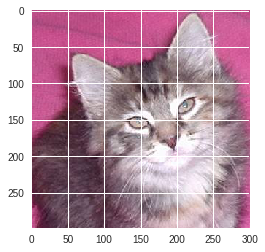

In [16]:
# check out an image
import os

# Just to be safe, reinstall PIL

# .listdir() = Return a list containing names of entries in dir given by path.
files = os.listdir(f'{PATH}valid/cats')[:5] 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [17]:
# check out dimesions of raw image (underlying data that makes up the cat pic)
img.shape

(299, 300, 3)

So,  the above image has 3 dimensions in an array, or a **RANK-3 TENSOR** 

In [18]:
# see 1st 4 rows and cols of the above image
img[:4,:4]

array([[[185,  80, 136],
        [182,  77, 133],
        [180,  75, 131],
        [180,  75, 131]],

       [[188,  81, 137],
        [185,  78, 134],
        [183,  76, 132],
        [183,  76, 132]],

       [[188,  81, 137],
        [186,  79, 135],
        [185,  78, 134],
        [185,  78, 134]],

       [[189,  80, 137],
        [188,  79, 136],
        [187,  78, 135],
        [188,  79, 136]]], dtype=uint8)

Each cells has 3 RGB pixel values. We will attempt to use these pixel values to predict if a picture is a cat or dog.

## 1st model: A Quick Start

Using a *pre-trained* model (created by some one else to solve a different problem) instead of building one from scratch to solve a similar problem. 

Using **resnet34** model, trained on **ImageNet** (1.2M images, 1k classes) as a starting point = a CNN = type of NN that builds state-of-the-art models for CV

(resnet34])[https://github.com/KaimingHe/deep-residual-networks] = a version of the model that won 2015 ImageNet competition. 

Train + evalulate dogs v. cats model in 4 lines of code, under 20 seconds:

In [19]:
arch = resnet34

# 'data' will contain the validation and training data 
#      specify w/ img size from before
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))

# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# setting epoch = 2 = looking over entire *validation* set of images 3 times
learn.fit(.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 56898510.25it/s]


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]


[0.     0.059  0.028  0.9897]
[1.     0.0551 0.0271 0.9897]
 57%|█████▋    | 206/360 [00:07<00:05, 26.74it/s, loss=0.0403]

[2.     0.0428 0.0244 0.9907]



The above prints out  

* `[epoch# value of loss function (cross-entropy loss) for training, value of loss function for validation, accuracy]`

Prior to this competition, state of the art (2013) = 80% accuracy, + competition resulted in a huge jump to 98.9% accuracy via the author of a popular DL library. Extraordinarily, < 4 years later, we can now beat that result in seconds, + even last year in this course, initial model = 98.3% accuracy, nearly double the error just a year later, + that took ~10 minutes to compute.

### Analyzing Results

Can look at overall metrics like above, as well as examples of:

* random correct labels
* random incorrect labels
* most correct labels of each class (highest probability of that're correct)
* most incorrect labels of each class (highest probability of that're incorrect)
* most uncertainlabels (probabilty closest to .5)

In [20]:
# look at labels for validation data (cats = 0, dogs = 1)
print(data.classes,"\n")
print(data.val_y)

['cats', 'dogs'] 

[0 0 0 ... 1 1 1]


In [21]:
# learn.predict() return predictions for validation set (in log-scale)
log_preds = learn.predict()
print(log_preds.shape)

(2000, 2)


In [22]:
# gotten 2000 predictions of probabilities of 2 labels
# look @ 1st 10 predictions in [dog log prob, cat log prob] format
log_preds[:10]

array([[ -0.0002,  -8.727 ],
       [ -0.0009,  -7.052 ],
       [ -0.0001,  -9.8274],
       [ -0.0008,  -7.0925],
       [ -0.0001,  -9.2095],
       [ -0.0004,  -7.8097],
       [ -0.0007,  -7.2937],
       [ -0.0003,  -8.1483],
       [ -0.    , -10.4108],
       [ -0.0014,  -6.6027]], dtype=float32)

In [0]:
# cobvert probabilities (across cols w/ axis=1) to binary label
preds = np.argmax(log_preds, axis = 1)

# get probability of being a dog and of being a cat
probs_dog = np.exp(log_preds[:,1])
probs_cat = np.exp(log_preds[:,0])

# set probs for plots below as probs_dog
probs = probs_dog

In [51]:
print("label predictions",preds[:5])
print("probability of being a dog",probs_dog[:5])
print("probability of being a cat",probs_cat[:5])

label predictions [0 0 0 0 0]
probability of being a dog [0.0002 0.0009 0.0001 0.0008 0.0001]
probability of being a cat [0.9998 0.9991 0.9999 0.9992 0.9999]


In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace=True)

def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows,len(ims)//rows, i+1)
    sp.axis('Off')
    
    if titles is not None:
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])
  
# def plot_val_with_title(idxs,title):
#  imgs = np.stack([data.val_ds[x][0] for x in idxs])
#  title_probs = [probs[x] for x in idxs]
#  print(title)
#  return plots(data.val_ds.denorm(imgs), rows=1, title=title_probs)

def load_img_id(ds,idx):
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs,title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly Classified


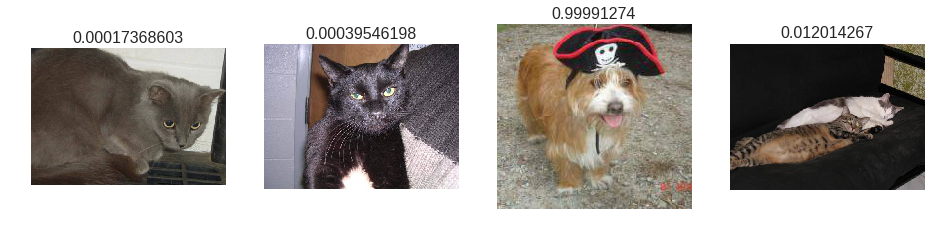

In [54]:
# look at some random correctly labelled images
plot_val_with_title(idxs=rand_by_correct(True),title='Correctly Classified')

Incorrectly Classified


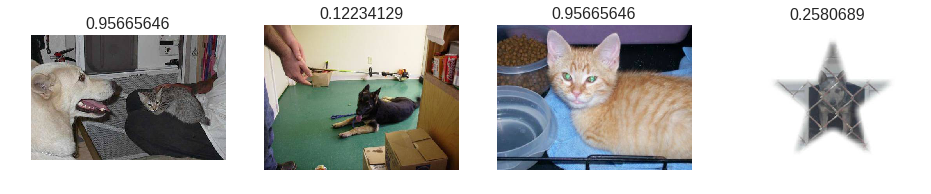

In [55]:
# look at some random incorrectly labelled images
plot_val_with_title(idxs=rand_by_correct(False),title='Incorrectly Classified')

In [0]:
def most_by_mask(mask,mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult*probs[idxs])[:4]]

def most_by_correct(y,is_correct):
  mult = -1 if (y==1) == is_correct else 1
  return most_by_mask(((preds==data.val_y) == is_correct) & (data.val_y == y), mult)

Most Correct Cats


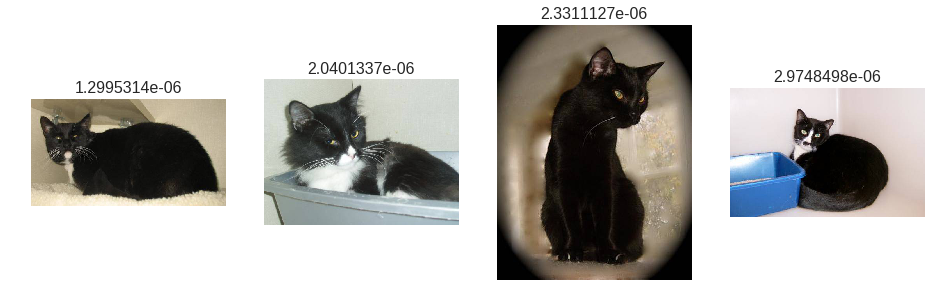

In [57]:
# check which its most confident are cats
plot_val_with_title(most_by_correct(y=0,is_correct=True),'Most Correct Cats')

Most Correct Dogs


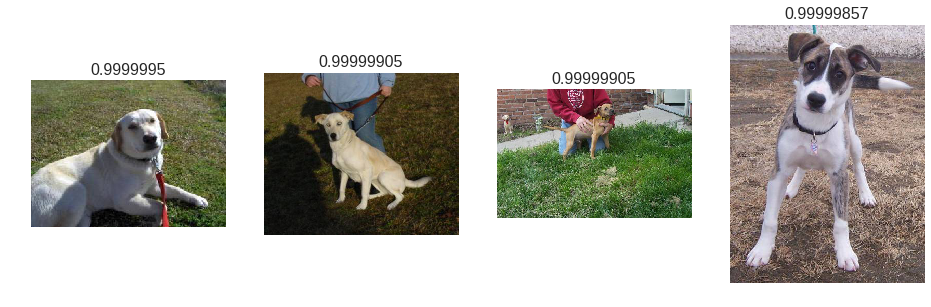

In [58]:
# check which its most confident are dogs
plot_val_with_title(most_by_correct(y=1,is_correct=True),'Most Correct Dogs')

Most Incorrect Cats


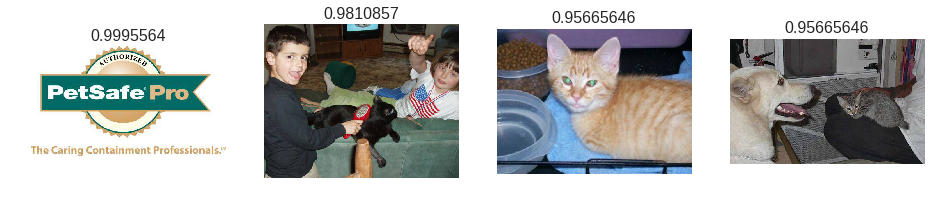

In [59]:
# what it thinks are correct (thinks are dogs but were actually cats)
# i.e. most confident its a dog but its a cat
plot_val_with_title(most_by_correct(y=0,is_correct=False),'Most Incorrect Cats')

Most Incorrect Dogs


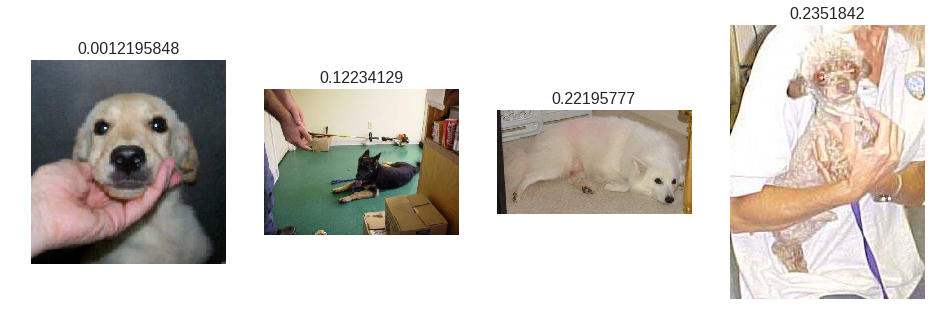

In [60]:
# what it thinks are incorrect (thinks are cats but were actually dogs)
# i.e. most confident its a cat but its a dog
plot_val_with_title(most_by_correct(y=1,is_correct=False),'Most Incorrect Dogs')

Most uncertain about


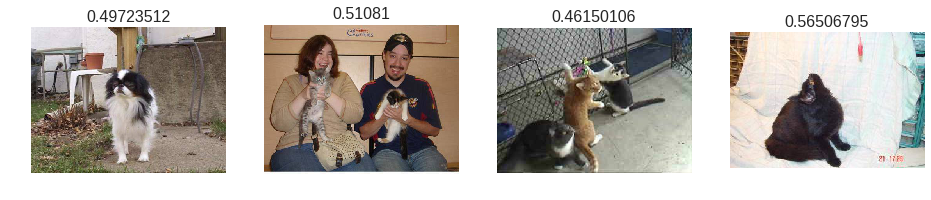

In [61]:
# see which imgs its most uncertain about (probability closest to threshold of .5)
# sort images after subtracting .5 and grab smallest (closes to .5 originally)
most_uncertain = np.argsort(np.abs(probs -.5))[:4]
plot_val_with_title(idxs=most_uncertain,title="Most uncertain about")

We want to look at our data b/c to double check what model is doing well and what it's doing badly (and may need to be fixed), and also to learn things about the data set ( such as what imgs shouldn't be there, like the logos).

One could now grab data (of different things) and put them into a similar dir structure as dogs and cats above and run the same model on it (30:47 in video)

In [7]:
  ## remove fastai directory if it already present and you are rerunning this notebook from the start
!rm -r -f courses

## clone in fastai to get Python files
!git clone https://github.com/fastai/courses.git

## copy Python files into correct (current working) directory
!cp ./courses/deeplearning1/nbs/utils.py ./
!cp ./courses/deeplearning1/nbs/vgg16.py ./
!cp ./courses/deeplearning1/nbs/vgg16bn.py ./
 
!pip install theano
!pip install keras==1.2.2
  
# import custom Python file to store any convenience functions
import utils; reload(utils) # reload to add any changes made to utils.py
from utils import plots

Cloning into 'courses'...
remote: Counting objects: 765, done.
remote: Total 765 (delta 0), reused 0 (delta 0), pack-reused 765
Receiving objects: 100% (765/765), 22.40 MiB | 34.13 MiB/s, done.
Resolving deltas: 100% (409/409), done.


Using TensorFlow backend.


# Use a pretrained VGG model with own custom Vgg16 class

We will use a fully-created model that recognizes a wide variety (~1000 categories) of images. **VGG** is one such model, which won the 2014 Imagenet competition (a well-regarded annual computer vision competition). It a image classification convolutional neural network, and is also a simple model to create and understand. The VGG Imagenet team created both a larger and slower but slightly more, accurate model (*VGG 19*) and a smaller and faster but slightly less accurate model (*VGG 16*). VGG 16 is what we're using since the slower performance of VGG 19 is not worth the very minor improvement in accuracy. 

We will utilize the VGG 16 model via a custom *Vgg16* Python class.

A note: The downside to the Imagenet categories is that all images are just of *one thing*. This makes items easier to identify compared to the real world and therefore really only works with "easier" problems. Using these datasets, one is inheriting the shortcomings and biases of the datasets. It's very important to preemptively look at the data you're going to be training on.

Most winners of Imagenet competitions make available their source code (i.e. the neural network architechture and their particular functional form) and the weights (the parameters learned via training models to identify images correctly).

The VGG model is a bit older but it's still good because its the last of the powerful yet still simple architectures that are not too much less accurate and are good for teaching purposes.

VGG is also good a network for adapting to different problems (identifying corn vs. cats vs. dogs vs. planets, etc.).

##State of the Art (2013) Custom Model in 7 Lines of Code

The code below is everything needed to achieve get 97% accuracy or better on the **[Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats)**. At this stage of image classification, we're just focusing on the minimum code necessary to actually do useful work and not to analyze how it works behind the scenes just yet.

The code below can then be adapted to any desired problems, so long as the data are organized correctly. All you have to do is to put your images into one folder per category, and run the code.

We're basically training a trained model, as VGG was trained to recognize the photos of the 1000 types in the Imagenet competition. This model won't classify dogs vs. cats right out of the box because there was category for cats and dogs in those datasets.

We will be fine tuning the pre-trained Imagenet model to say "use everything you know about the 1000 Imagenet categories in order to classify dogs vs. cats."

As mentioned before, in the end, the code below will work for any image recognition task where you're trying to identify a single class for any number of categories, not just dogs vs cats (but not multiple classes in one image).

In [0]:
# Want batch size as large as possible, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [0]:
## Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

using vgg 16 + which is sitting on top of keras (deep learning library) which sits on top of theano (thing that takes python code + compiles it into GPU code [could also stand on top of tensorflow]) which sits on top of NVIDIA kuda (?) coding environemtn, and part of cuda = cuda deep neural network library (cuDNN)
  - keras = written in pure python, takes architecutres + code + turns into theano code but could turn in tensorflow code
  - tensorflow + theano = similar, both sit on top of cuda + provide Python-to-GPU mapping
  - tensorflow =  from google, good for things google wants to do, like runnin gthings on a lot GPUs
  - "cant do anything w/ DL w/out vast amnts of data + GPUs" = *FALSE*
    - true if u want to win imagenet since you're competing for last .01% vs. Google + microsoft + Baidu
  - 1 GPU can be acceptable for most simpler problems

for most important things in deep learning, theano simply calls a funcion inside cuDNN

the above is all taken care of with the setup scripts for this course 

theano has been around longer, easier ot use, doesn't do multiple GPU's well, but does everything else well

if build something in keras + we have acceptable improvement (say 400%), but we want the extra 8% that comes from using more GPUs, there is a simple configuration change to switch the backend to tensorflow

Ex:

In [10]:
# ~ = home dir in bash
!vim ~/.keras/keras.json # config file

# will see "backend": "theano" line --> just change to tensorflow + rerun the json file
# now using tensorflow which will use all ur GPUs
# recommended to chance "image_dim_ordering": "th" to "tf"

 
# another configuration file = ~/.theanorc (many unix-y config files are .xxxxrc)
# if using t2 instance in AWS, the AMI changes 'device =' from 'gpu' to 'cpu'
# - t2 cant use GPU, p2 can

/bin/sh: 1: vim: not found


In [0]:
## create VGG object to get access to the pre-trained network
vgg = Vgg16()

In Deep Learning, never look at one image at a time or all iamges at a time. Look at **batches/mini-batches**. 

Mini-batch grabs a few imgs at a time + computes on all of them at once

dont' do 1 at a time b/c a GPU should do lots of things at once to be useful --> single img not enough to keep it busy + its slow
dont do all b/c GPU has a set amnt of memory (2-12 GB) + many datasets wont fit in here
  - also don't NEED to use ALL
  - pretty much everything we need to do we can do a small step at a time

In [42]:
## define path to training data and sample data
# good idea to put it in a subdirectory of the notebooks folder, and then exclude that directory from git control by adding it to .gitignore.)
path = "data/dogscats/"
path_smpl = "data/dogscats/sample/"  

## Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category

# inside VGG model, go to the 'train' folder from path + grab images, and do same for validation images
batches = vgg.get_batches(path_smpl+'train', batch_size=4)
val_batches = vgg.get_batches(path_smpl+'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


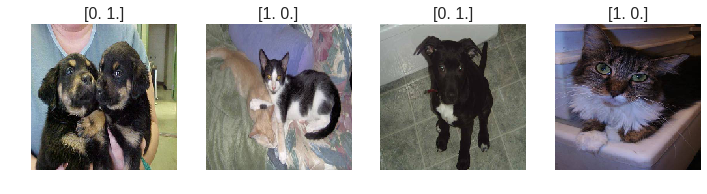

In [43]:
## grab 1 batch = 4 images + 4 labels
imgs, labels = next(batches)

## see the images
plots(imgs, titles=labels)

[1,0] = cat, [0,1] = dog

In [44]:
## pass in images to .predict() method
# will ignore the labels and use the pre-trained VGG model to predict what the four images above are
vgg.predict(imgs, True)

(array([0.2458, 0.1573, 0.1786, 0.6288], dtype=float32),
 array([158, 362, 195, 283]),
 [u'toy_terrier', u'badger', u'Boston_bull', u'Persian_cat'])

believes we have a toy_terrier, badger, boston bull, and persian cat. so 3/4 = 75% --> confused by backgroudn stuff

also shows probability/confidence in guess --> 24% sure we have a toy terrier, most confident in persian cat, least in boston bull

In [45]:
## extract out 1st four category indexes based on ordering of categories in VGG model
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

can take the above probabilties + turn into cats vs dogs model (next class = in-depth revisit of how this works)

there are 1k probabilties (1 for each category label in the model) --> we will turn into cats vs dog predictions w/ `.finetune()`

In [0]:
## build new model and replace original 1000 categories with the classes found in cats and dogs dir
# these dir's foudn in path/train folder
# returned fine-tuned model that will search for cats + dogs
vgg.finetune(batches)

now we must trian the model w/ `.fit` which uses gradient descent (backprop) to attempt to make model better + better at IDing cats vs. dogs

will be fast + inaccurate since we only have 16 data objects in sample

**(An epoch is one full pass through the training data.)** ==> Finally, we fit() the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch.


In [47]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 1s - loss: 0.5051 - acc: 0.8125 - val_loss: 0.4130 - val_acc: 0.8750


as we run more + more, accuracy will increase, but validaitoin accuracy will not as much

In [48]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.3248 - acc: 0.7500 - val_loss: 0.1942 - val_acc: 0.8750


In [49]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0394 - acc: 1.0000 - val_loss: 0.0846 - val_acc: 1.0000


In [50]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0421 - acc: 1.0000 - val_loss: 0.0551 - val_acc: 1.0000


The code above will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.

Let's take a look at how this works in 1 code block

In [0]:
# Want batch size as large as possible, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

## Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## create VGG object to get access to the pre-trained network
vgg = Vgg16()

## inside VGG model, go to the 'train' folder from path + grab
batches = vgg.get_batches(path_smpl+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

## Use Vgg16 for basic image recognition

Let's start off by using the *Vgg16* class to recognise the main imagenet category for each image.

We won't be able to enter the Cats vs Dogs competition with an Imagenet model alone, since 'cat' and 'dog' are not categories in Imagenet - instead each individual breed is a separate category. However, we can use it to see how well it can recognise the images, which is a good first step.

First, create a Vgg16 object:

In [0]:
vgg = Vgg16()

Vgg16 is built on top of *Keras* (which we will be learning much more about shortly!), a flexible, easy to use deep learning library that sits on top of Theano or Tensorflow. Keras reads groups of images and labels in *batches*, using a fixed directory structure, where images from each category for training must be placed in a separate folder.

Let's grab batches of data from our training folder:

In [0]:
batches = vgg.get_batches(path+'train', batch_size=4)

(BTW, when Keras refers to 'classes', it doesn't mean python classes - but rather it refers to the categories of the labels, such as 'pug', or 'tabby'.)

*Batches* is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.

In [0]:
imgs,labels = next(batches)

As you can see, the labels for each image are an array, containing a 1 in the first position if it's a cat, and in the second position if it's a dog. This approach to encoding categorical variables, where an array containing just a single 1 in the position corresponding to the category, is very common in deep learning. It is called *one hot encoding*. 

The arrays contain two elements, because we have two categories (cat, and dog). If we had three categories (e.g. cats, dogs, and kangaroos), then the arrays would each contain two 0's, and one 1.

In [0]:
plots(imgs, titles=labels)

We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.

In [0]:
vgg.predict(imgs, True)

The category indexes are based on the ordering of categories used in the VGG model - e.g here are the first four:

In [0]:
vgg.classes[:4]

(Note that, other than creating the Vgg16 object, none of these steps are necessary to build a model; they are just showing how to use the class to view imagenet predictions.)